# Tambien Stratigraphy

This jupyter notebook (Python 3 kernel) plots and analyzes stratigraphic data collected from the Tambien Group of Ethiopia.

## Standard Modules

Import standard modules included in most Python 3 distributions:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## pystrat

This notebook requires the pystrat module (https://github.com/yuempark/pystrat) to work.

For further information on its implementation, the reader is referred to the documentation within pystrat.

Since this module is still in development and this is constantly evolving, we include a snapshot of it within this repository that will allow the execution of the code included in this notebook:

In [2]:
import sys
sys.path.insert(0, '../../pystrat')
from pystrat import *

## Data

Import all the Tambien Group data that was collected by our group using the `read_data()` function from pystrat:

In [3]:
header_line = 4

# pre-2015
T1 = read_data('Data/pre-2015/T1.csv', header=header_line)
T3 = read_data('Data/pre-2015/T3.csv', header=header_line)
T4 = read_data('Data/pre-2015/T4.csv', header=header_line)
T5 = read_data('Data/pre-2015/T5.csv', header=header_line)
T6 = read_data('Data/pre-2015/T6_2010.csv', header=header_line)
T7 = read_data('Data/pre-2015/T7_2010_2013.csv', header=header_line)
T9 = read_data('Data/pre-2015/T9.csv', header=header_line)
T10 = read_data('Data/pre-2015/T10.csv', header=header_line)
T11 = read_data('Data/pre-2015/T11.csv', header=header_line)
T14 = read_data('Data/pre-2015/T14.csv', header=header_line)
T15 = read_data('Data/pre-2015/T15.csv', header=header_line)
T16 = read_data('Data/pre-2015/T16.csv', header=header_line)
T17 = read_data('Data/pre-2015/T17.csv', header=header_line)
T18 = read_data('Data/pre-2015/T18.csv', header=header_line)
T20 = read_data('Data/pre-2015/T20.csv', header=header_line)
T21 = read_data('Data/pre-2015/T21.csv', header=header_line)
T22 = read_data('Data/pre-2015/T22.csv', header=header_line)
T23 = read_data('Data/pre-2015/T23.csv', header=header_line)
T27 = read_data('Data/pre-2015/T27.csv', header=header_line)
T28 = read_data('Data/pre-2015/T28.csv', header=header_line)
T29 = read_data('Data/pre-2015/T29.csv', header=header_line)
T30 = read_data('Data/pre-2015/T30.csv', header=header_line)
T35 = read_data('Data/pre-2015/T35.csv', header=header_line)
Negash_Clasts = pd.read_csv('Data/pre-2015/Negash_Clasts.csv')

# 2015
T1b = read_data('Data/2015/T1b.csv', header=header_line)
T6_2015 = read_data('Data/2015/T6_2015.csv', header=header_line)
T37 = read_data('Data/2015/T37.csv', header=header_line)
T38 = read_data('Data/2015/T38.csv', header=header_line)
T39 = read_data('Data/2015/T39.csv', header=header_line)
T40 = read_data('Data/2015/T40.csv', header=header_line)
T41 = read_data('Data/2015/T41.csv', header=header_line)
T42 = read_data('Data/2015/T42.csv', header=header_line)
T43 = read_data('Data/2015/T43.csv', header=header_line)
T44 = read_data('Data/2015/T44.csv', header=header_line)
T45 = read_data('Data/2015/T45.csv', header=header_line)
T46 = read_data('Data/2015/T46.csv', header=header_line)
T47 = read_data('Data/2015/T47.csv', header=header_line)
T48 = read_data('Data/2015/T48.csv', header=header_line)
T49 = read_data('Data/2015/T49.csv', header=header_line)
T50 = read_data('Data/2015/T50.csv', header=header_line)
T51 = read_data('Data/2015/T51.csv', header=header_line)
T52 = read_data('Data/2015/T52.csv', header=header_line)
T53 = read_data('Data/2015/T53.csv', header=header_line)
T54 = read_data('Data/2015/T54.csv', header=header_line)
T55 = read_data('Data/2015/T55.csv', header=header_line)
T56 = read_data('Data/2015/T56.csv', header=header_line)
Samre_Clasts = pd.read_csv('Data/2015/Samre_Clasts.csv')

# 2017
T58 = read_data('Data/2017/T58.csv', header=header_line)
T60 = read_data('Data/2017/T60.csv', header=header_line)
T61 = read_data('Data/2017/T61.csv', header=header_line)
T62 = read_data('Data/2017/T62.csv', header=header_line)
T63 = read_data('Data/2017/T63.csv', header=header_line)
T64 = read_data('Data/2017/T64.csv', header=header_line)
T65 = read_data('Data/2017/T65.csv', header=header_line)
T66 = read_data('Data/2017/T66.csv', header=header_line)
Y01 = read_data('Data/2017/Y01.csv', header=header_line)
Y02 = read_data('Data/2017/Y02.csv', header=header_line)
Y03 = read_data('Data/2017/Y03.csv', header=header_line)
Y04 = read_data('Data/2017/Y04.csv', header=header_line)
Y05 = read_data('Data/2017/Y05.csv', header=header_line)
Y06 = read_data('Data/2017/Y06.csv', header=header_line)
Y07 = read_data('Data/2017/Y07.csv', header=header_line)
Y08 = read_data('Data/2017/Y08.csv', header=header_line)
Y09 = read_data('Data/2017/Y09.csv', header=header_line)
Y10 = read_data('Data/2017/Y10.csv', header=header_line)

# a list with all the Berkeley/Princeton Group sections
all_sections = [T1, T3, T4, T5, T6, T7, T9, T10,
                T11, T14, T15, T16, T17, T18, T20,
                T21, T22, T23, T27, T28, T29, T30,
                T35, T37, T38, T39, T40,
                T41, T42, T43, T44, T45, T46, T47, T48, T49, T50,
                T51, T52, T53, T54, T55, T56, T60,
                T61, T62, T63, T64, T65, T66,
                Y01, Y02, Y03, Y04, Y05, Y06, Y07, Y08, Y09, Y10]

# make a list of the section names in the same order as the list above
all_section_names = []
for i in range(len(all_sections)):
    for key, val in list(locals().items()):
        if val is all_sections[i]:
            all_section_names.append(key)
            break

Import data from Miller et al. (2009), and pull out only the data for which we have a good understanding of its context:

> Miller, N. R., Stern, R. J., Avigad, D., Beyth, M., and Schilman, B., 2009, Cryogenian slate-carbonate sequences of the Tambien Group, Northern Ethiopia (I): Pre-“Sturtian” chemostratigraphy and regional correlations: Precambrian Research, vol. 170, pp. 129–156, doi:10.1016/j.precamres.2008.12.004.

In [4]:
Miller2009a = pd.read_csv('Data/pre-2015/Miller2009a_data.csv')

# just pull out data that we are interested in, then clean it up
Miller2009a_MaiKenetal = Miller2009a[(Miller2009a['section']=='Mai Kenetal A') |
                                     (Miller2009a['section']=='Mai Kenetal B')].copy()
Miller2009a_Negash = Miller2009a[(Miller2009a['section']=='West Negash Madahne Alem') |
                                 (Miller2009a['section']=='West Negash B') |
                                 (Miller2009a['section']=='West Negash A')].copy()
Miller2009a_MaiKenetal.sort_values(by='strat_height', inplace=True)
Miller2009a_Negash.sort_values(by='strat_height', inplace=True)
Miller2009a_MaiKenetal.reset_index(drop=True, inplace=True)
Miller2009a_Negash.reset_index(drop=True, inplace=True)

# drop diamictite data
Miller2009a_Negash.drop([40,41,42], inplace=True)
Miller2009a_Negash.reset_index(drop=True, inplace=True)

# drop some non-carbonate data
Miller2009a_MaiKenetal.drop([0], inplace=True)
Miller2009a_MaiKenetal.reset_index(drop=True, inplace=True)

ICP-OES analysis on bulk element concentrations sometimes produces non-sensical results (i.e. negative concentrations) when the concentration of a particular element is below the detection limit (BDL) of the spectrometer. Therefore, we get rid of these data:

In [5]:
for section in all_sections:
    if 'CARB_Sr_ppm' in section.columns:
        for i in range(len(section.index)):
            if section['CARB_Ca_ppm'][i] < 0:
                section.loc[i,'CARB_Ca_ppm'] = float('NaN')
            if section['CARB_Mg_ppm'][i] < 0:
                section.loc[i,'CARB_Mg_ppm'] = float('NaN')
            if section['CARB_Al_ppm'][i] < 0:
                section.loc[i,'CARB_Al_ppm'] = float('NaN')
            if section['CARB_Fe_ppm'][i] < 0:
                section.loc[i,'CARB_Fe_ppm'] = float('NaN')
            if section['CARB_K_ppm'][i] < 0:
                section.loc[i,'CARB_K_ppm'] = float('NaN')
            if section['CARB_Mn_ppm'][i] < 0:
                section.loc[i,'CARB_Mn_ppm'] = float('NaN')
            if section['CARB_Na_ppm'][i] < 0:
                section.loc[i,'CARB_Na_ppm'] = float('NaN')
            if section['CARB_Sr_ppm'][i] < 0:
                section.loc[i,'CARB_Sr_ppm'] = float('NaN')

Create a master dataframe with all the carbonate data (excluding diamictite clast data):

In [6]:
# initiate the dataframe
carb_df_cols = ['section','CARB_SAMPLE','CARB_REMARKS','CARB_HEIGHT','CARB_UNIT',
                'CARB_d13C','CARB_d13C_std','CARB_d18O','CARB_d18O_std',
                'CARB_mts_mtx','CARB_d44_40Ca','CARB_87Sr/86Sr',
                'CARB_Al_ppm','CARB_Ca_ppm','CARB_Fe_ppm','CARB_Mg_ppm',
                'CARB_Mn_ppm','CARB_K_ppm','CARB_Na_ppm','CARB_Sr_ppm']
carb_df = pd.DataFrame(columns=carb_df_cols)

# iterate through all the sections
for i in range(len(all_sections)):
    
    # get the names of the CARB columns in the section
    CARB_cols = []
    for j in range(len(all_sections[i].columns)):
        if 'CARB' in all_sections[i].columns[j]:
            CARB_cols.append(all_sections[i].columns[j])
            
    if len(CARB_cols) > 0:
        
        # pull out those columns, remove NaN's, and add a section column
        CARB_cols_df = all_sections[i][CARB_cols].copy()
        CARB_cols_df = CARB_cols_df[~np.isnan(CARB_cols_df['CARB_SAMPLE'])].copy()
        CARB_cols_df['section'] = [all_section_names[i]] * len(CARB_cols_df.index)

        # append to the master dataframe
        carb_df = carb_df.append(CARB_cols_df, ignore_index=True)
        
# if the mts_mtx column is empty, assume that it is a mtx sample
for i in range(len(carb_df.index)):
    if pd.isnull(carb_df['CARB_mts_mtx'][i]):
        carb_df.loc[i, 'CARB_mts_mtx'] = 'mtx'
        
# reorder the columns
carb_df = carb_df[carb_df_cols]

/Users/yuempark/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Do the same for the Miller et al. (2009) data:

In [7]:
# pull out the columns that we want and rename them
Miller2009a_MaiKenetal = pd.DataFrame({'section':Miller2009a_MaiKenetal['section'],
                                       'CARB_SAMPLE':Miller2009a_MaiKenetal['transect/sample_id'],
                                       'CARB_HEIGHT':Miller2009a_MaiKenetal['strat_height'],
                                       'CARB_87Sr/86Sr':Miller2009a_MaiKenetal['87Sr/86Sr'],
                                       'CARB_Sr_ppm':Miller2009a_MaiKenetal['Sr_ppm'],
                                       'CARB_Fe_ppm':Miller2009a_MaiKenetal['Fe_ppm'],
                                       'CARB_Mn_ppm':Miller2009a_MaiKenetal['Mn_ppm'],
                                       'CARB_d13C':Miller2009a_MaiKenetal['d13C'],
                                       'CARB_d18O':Miller2009a_MaiKenetal['d18O']})
Miller2009a_Negash = pd.DataFrame({'section':Miller2009a_Negash['section'],
                                   'CARB_SAMPLE':Miller2009a_Negash['transect/sample_id'],
                                   'CARB_HEIGHT':Miller2009a_Negash['strat_height'],
                                   'CARB_87Sr/86Sr':Miller2009a_Negash['87Sr/86Sr'],
                                   'CARB_Sr_ppm':Miller2009a_Negash['Sr_ppm'],
                                   'CARB_Fe_ppm':Miller2009a_Negash['Fe_ppm'],
                                   'CARB_Mn_ppm':Miller2009a_Negash['Mn_ppm'],
                                   'CARB_d13C':Miller2009a_Negash['d13C'],
                                   'CARB_d18O':Miller2009a_Negash['d18O']})

# rename the sections
Miller2009a_Negash['section'] = ['Miller2009a Negash'] * len(Miller2009a_Negash.index)
Miller2009a_MaiKenetal['section'] = ['Miller2009a Mai Kenetal'] * len(Miller2009a_MaiKenetal.index)

# add a mts_mtx column
Miller2009a_Negash['CARB_mts_mtx'] = ['mtx'] * len(Miller2009a_Negash.index)
Miller2009a_MaiKenetal['CARB_mts_mtx'] = ['mtx'] * len(Miller2009a_MaiKenetal.index)

# add to the master dataframe
carb_df = carb_df.append(Miller2009a_MaiKenetal, ignore_index=True)
carb_df = carb_df.append(Miller2009a_Negash, ignore_index=True)

## Sr Alteration

This section uses [Mn], [Sr], and $^{87}$Sr/$^{86}$Sr to determine which samples have been altered.

Below is a function that plots carbonate data that passes/fails selected [Sr] and [Mn]/[Sr] thresholds:

In [8]:
def plot_Sr_thresholds(df, Sr_threshold, MnSr_threshold):
    """
    Plot [Sr] vs. 87Sr/86Sr and [Mn]/[Sr] vs. 87Sr/86Sr, with the thresholds marked.
    
    Parameters
    ----------
    df : pandas dataframe
        includes the carbonate data
    Sr_threshold : float
        threshold [Sr] to be plotted
    MnSr_threshold : float
        threshold [Mn]/[Sr] to be plotted
        
    Returns
    -------
    fig : figure handle
    ax : axes handles
    """
    fig, ax = plt.subplots(1, 2, figsize=(9,4), sharey=True)
    
    # create a Mn/Sr column
    df['CARB_Mn/Sr'] = df['CARB_Mn_ppm'] / df['CARB_Sr_ppm']
    
    # split the data according to the thresholds
    mtx_pass = df[(df['CARB_mts_mtx']=='mtx')&(df['CARB_Sr_ppm']>=Sr_threshold)&(df['CARB_Mn/Sr']<=MnSr_threshold)]
    mts_pass = df[(df['CARB_mts_mtx']=='mts')&(df['CARB_Sr_ppm']>=Sr_threshold)&(df['CARB_Mn/Sr']<=MnSr_threshold)]
    mtx_fail = df[(df['CARB_mts_mtx']=='mtx')&((df['CARB_Sr_ppm']<Sr_threshold)|(df['CARB_Mn/Sr']>MnSr_threshold))]
    mts_fail = df[(df['CARB_mts_mtx']=='mts')&((df['CARB_Sr_ppm']<Sr_threshold)|(df['CARB_Mn/Sr']>MnSr_threshold))]
    
    # plot
    ax[0].scatter(mtx_fail['CARB_Sr_ppm'],mtx_fail['CARB_87Sr/86Sr'],
                  marker='o',c='C7',edgecolors='none',label='altered')
    ax[0].scatter(mts_fail['CARB_Sr_ppm'],mts_fail['CARB_87Sr/86Sr'],
                  marker='^',facecolors='w',edgecolors='C7',linewidths=1,label='altered (MTS)')
    ax[0].scatter(mtx_pass['CARB_Sr_ppm'],mtx_pass['CARB_87Sr/86Sr'],
                  marker='o',c='C1',edgecolors='none',label='primary')
    ax[0].scatter(mts_pass['CARB_Sr_ppm'],mts_pass['CARB_87Sr/86Sr'],
                  marker='^',facecolors='w',edgecolors='C1',linewidths=1,label='primary (MTS)')
    
    ax[1].scatter(mtx_fail['CARB_Mn/Sr'],mtx_fail['CARB_87Sr/86Sr'],
                  marker='o',c='C7',edgecolors='none',label='altered')
    ax[1].scatter(mts_fail['CARB_Mn/Sr'],mts_fail['CARB_87Sr/86Sr'],
                  marker='^',facecolors='w',edgecolors='C7',linewidths=1,label='altered (MTS)')
    ax[1].scatter(mtx_pass['CARB_Mn/Sr'],mtx_pass['CARB_87Sr/86Sr'],
                  marker='o',c='C1',edgecolors='none',label='primary')
    ax[1].scatter(mts_pass['CARB_Mn/Sr'],mts_pass['CARB_87Sr/86Sr'],
                  marker='^',facecolors='w',edgecolors='C1',linewidths=1,label='primary (MTS)')
    
    # prettify
    ax[0].axvline(Sr_threshold,color='k')
    ax[0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
    ax[0].set_xlabel('[Sr] (ppm)')
    ax[0].grid(ls='--')
    
    ax[1].axvline(MnSr_threshold,color='k')
    ax[1].set_xlabel('[Mn]/[Sr]')
    ax[1].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
    ax[1].grid(ls='--')
    
    return fig, ax

### Berkeley/Princeton Group's Data

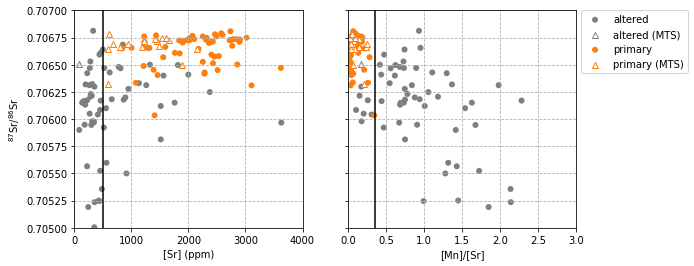

In [9]:
Sr_threshold = 500
MnSr_threshold = 0.35

fig, ax = plot_Sr_thresholds(carb_df, Sr_threshold, MnSr_threshold)
ax[0].set_ylim(0.705, 0.707)
ax[0].set_xlim(0,4000)
ax[1].set_xlim(0,3)
plt.show(fig)

Compare molar tooth structure (MTS) data to adjacent matrix (MTX) data.

This code generates Figure DR4 in the data repository.

NameError: name 'mtx_Sr_vals' is not defined

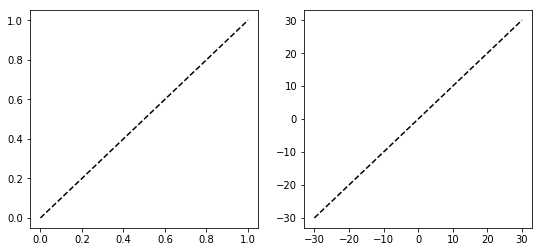

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

ax[0].plot([0,1],[0,1],color='k',linestyle='--')
ax[1].plot([-30,30],[-30,30],color='k',linestyle='--')
            
ax[0].scatter(mtx_Sr_vals, mts_Sr_vals)
ax[1].scatter(mtx_C_vals, mts_C_vals)
            
ax[0].set_xlim(0.7065, 0.707)
ax[0].set_ylim(0.7065, 0.707)
ax[0].set_xlabel('matrix $^{87}$Sr/$^{86}$Sr')
ax[0].set_ylabel('molar tooth structure $^{87}$Sr/$^{86}$Sr')
ax[0].set_axisbelow(True)
ax[0].grid(ls='--')
ax[0].text(0.9, 0.05, 'n = ' + str(len(mtx_Sr_vals)),
           horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)

ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_xlim(-5, 10)
ax[1].set_ylim(-5, 10)
ax[1].set_xticks([-5,0,5,10])
ax[1].set_yticks([-5,0,5,10])
ax[1].set_xlabel('matrix $\delta^{13}$C')
ax[1].set_ylabel('molar tooth structure $\delta^{13}$C', rotation=270, labelpad=20)
ax[1].set_axisbelow(True)
ax[1].grid(ls='--')
ax[1].text(0.9, 0.05, 'n = ' + str(len(mtx_C_vals)),
           horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

#plt.savefig('../../Manuscript/Figures/MTS_MTX_Comparison.pdf', bbox_inches='tight')
plt.show(fig)

### Miller et al. (2009) Data

In [ ]:
Miller2009a_carb_df = carb_df[(carb_df['section']=='Miller2009a Mai Kenetal') |
                              (carb_df['section']=='Miller2009a Negash')].copy()

# note that we are using the same thresholds as the data collected in the Berkeley/Princeton Groups
fig, ax = plot_Sr_thresholds(Miller2009a_carb_df, Sr_threshold, MnSr_threshold)
ax[0].set_ylim(0.7045, 0.7075)
ax[0].set_xlim(0,3500)
ax[1].set_xlim(0,8)
plt.show(fig)

### Together

Combine the Berkeley/Princeton Group's data with that from Miller et al. (2009).

This code produces Figure 11 in the manuscript (some minor modifications to the figure were made outside of Python):

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(9,9), sharey='row')

# split the data according to the thresholds
mtx_pass = carb_df[(carb_df['CARB_mts_mtx']=='mtx') &
                   (carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                   (carb_df['CARB_Mn/Sr']<=MnSr_threshold)]
mts_pass = carb_df[(carb_df['CARB_mts_mtx']=='mts') &
                   (carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                   (carb_df['CARB_Mn/Sr']<=MnSr_threshold)]
mtx_fail = carb_df[(carb_df['CARB_mts_mtx']=='mtx') &
                   ((carb_df['CARB_Sr_ppm']<Sr_threshold) | (carb_df['CARB_Mn/Sr']>MnSr_threshold))]
mts_fail = carb_df[(carb_df['CARB_mts_mtx']=='mts') &
                   ((carb_df['CARB_Sr_ppm']<Sr_threshold) | (carb_df['CARB_Mn/Sr']>MnSr_threshold))]

# note that all Miller data is mtx
Miller_mtx_pass = Miller2009a_carb_df[(Miller2009a_carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                                      (Miller2009a_carb_df['CARB_Mn/Sr']<=MnSr_threshold)]
Miller_mtx_fail = Miller2009a_carb_df[(Miller2009a_carb_df['CARB_Sr_ppm']<Sr_threshold) |
                                      (Miller2009a_carb_df['CARB_Mn/Sr']>MnSr_threshold)]

# plot
ax[0][0].scatter(Miller_mtx_fail['CARB_Sr_ppm'],Miller_mtx_fail['CARB_87Sr/86Sr'],
                 marker='s',c='C7',edgecolors='none',label='altered (Miller et al., 2009)')
ax[0][0].scatter(mtx_fail['CARB_Sr_ppm'],mtx_fail['CARB_87Sr/86Sr'],
                 marker='o',c='C7',edgecolors='none',label='altered')
ax[0][0].scatter(mts_fail['CARB_Sr_ppm'],mts_fail['CARB_87Sr/86Sr'],
                 marker='^',facecolors='C7',edgecolors='k',linewidths=1,label='altered (MTS)')
ax[0][0].scatter(Miller_mtx_pass['CARB_Sr_ppm'],Miller_mtx_pass['CARB_87Sr/86Sr'],
                 marker='s',c='C1',edgecolors='none',label='primary (Miller et al., 2009)')
ax[0][0].scatter(mtx_pass['CARB_Sr_ppm'],mtx_pass['CARB_87Sr/86Sr'],
                 marker='o',c='C1',edgecolors='none',label='primary')
ax[0][0].scatter(mts_pass['CARB_Sr_ppm'],mts_pass['CARB_87Sr/86Sr'],
                 marker='^',facecolors='C1',edgecolors='k',linewidths=1,label='primary (MTS)')

ax[0][1].scatter(Miller_mtx_fail['CARB_Mn/Sr'],Miller_mtx_fail['CARB_87Sr/86Sr'],
                 marker='s',c='C7',edgecolors='none',label='altered (Miller et al., 2009)')
ax[0][1].scatter(mtx_fail['CARB_Mn/Sr'],mtx_fail['CARB_87Sr/86Sr'],
                 marker='o',c='C7',edgecolors='none',label='altered')
ax[0][1].scatter(mts_fail['CARB_Mn/Sr'],mts_fail['CARB_87Sr/86Sr'],
                 marker='^',facecolors='C7',edgecolors='k',linewidths=1,label='altered (MTS)')
ax[0][1].scatter(Miller_mtx_pass['CARB_Mn/Sr'],Miller_mtx_pass['CARB_87Sr/86Sr'],
                 marker='s',c='C1',edgecolors='none',label='primary (Miller et al., 2009)')
ax[0][1].scatter(mtx_pass['CARB_Mn/Sr'],mtx_pass['CARB_87Sr/86Sr'],
                 marker='o',c='C1',edgecolors='none',label='primary')
ax[0][1].scatter(mts_pass['CARB_Mn/Sr'],mts_pass['CARB_87Sr/86Sr'],
                 marker='^',facecolors='C1',edgecolors='k',linewidths=1,label='primary (MTS)')

ax[1][0].scatter(Miller_mtx_fail['CARB_Mn_ppm'],Miller_mtx_fail['CARB_Sr_ppm'],
                 marker='s',c='C7',edgecolors='none',label='altered (Miller et al., 2009)')
ax[1][0].scatter(mtx_fail['CARB_Mn_ppm'],mtx_fail['CARB_Sr_ppm'],
                 marker='o',c='C7',edgecolors='none',label='altered')
ax[1][0].scatter(mts_fail['CARB_Mn_ppm'],mts_fail['CARB_Sr_ppm'],
                 marker='^',facecolors='C7',edgecolors='k',linewidths=1,label='altered (MTS)')
ax[1][0].scatter(Miller_mtx_pass['CARB_Mn_ppm'],Miller_mtx_pass['CARB_Sr_ppm'],
                 marker='s',c='C1',edgecolors='none',label='primary (Miller et al., 2009)')
ax[1][0].scatter(mtx_pass['CARB_Mn_ppm'],mtx_pass['CARB_Sr_ppm'],
                 marker='o',c='C1',edgecolors='none',label='primary')
ax[1][0].scatter(mts_pass['CARB_Mn_ppm'],mts_pass['CARB_Sr_ppm'],
                 marker='^',facecolors='C1',edgecolors='k',linewidths=1,label='primary (MTS)')

ax[1][1].scatter(Miller_mtx_fail['CARB_d18O'],Miller_mtx_fail['CARB_Sr_ppm'],
                 marker='s',c='C7',edgecolors='none',label='altered (Miller et al., 2009)')
ax[1][1].scatter(mtx_fail['CARB_d18O'],mtx_fail['CARB_Sr_ppm'],
                 marker='o',c='C7',edgecolors='none',label='altered')
ax[1][1].scatter(mts_fail['CARB_d18O'],mts_fail['CARB_Sr_ppm'],
                 marker='^',facecolors='C7',edgecolors='k',linewidths=1,label='altered (MTS)')
ax[1][1].scatter(Miller_mtx_pass['CARB_d18O'],Miller_mtx_pass['CARB_Sr_ppm'],
                 marker='s',c='C1',edgecolors='none',label='primary (Miller et al., 2009)')
ax[1][1].scatter(mtx_pass['CARB_d18O'],mtx_pass['CARB_Sr_ppm'],
                 marker='o',c='C1',edgecolors='none',label='primary')
ax[1][1].scatter(mts_pass['CARB_d18O'],mts_pass['CARB_Sr_ppm'],
                 marker='^',facecolors='C1',edgecolors='k',linewidths=1,label='primary (MTS)')

# prettify
ax[0][0].axvline(Sr_threshold,color='k')
ax[0][0].set_ylabel('$^{87}$Sr/$^{86}$Sr')
ax[0][0].set_xlabel('[Sr] (ppm)')
ax[0][0].set_axisbelow(True)
ax[0][0].grid(ls='--')
ax[0][0].set_ylim(0.7045,0.707)
ax[0][0].set_xlim(0,4000)

ax[0][1].axvline(MnSr_threshold,color='k')
ax[0][1].set_xlabel('[Mn]/[Sr]')
ax[0][1].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
ax[0][1].set_axisbelow(True)
ax[0][1].grid(ls='--')
ax[0][1].set_xlim(0,2.5)

ax[1][0].axhline(Sr_threshold,color='k')
ax[1][0].set_xlabel('[Mn]/[Sr]')
ax[1][0].set_axisbelow(True)
ax[1][0].grid(ls='--')
ax[1][0].plot(np.linspace(0,10000)*MnSr_threshold,np.linspace(0,10000),color='k')
ax[1][0].set_xlabel('[Mn] (ppm)')
ax[1][0].set_ylabel('[Sr] (ppm)')
ax[1][0].set_ylim(0,4000)
ax[1][0].set_xlim(0,9000)

ax[1][1].axhline(Sr_threshold,color='k')
ax[1][1].set_xlabel('$\delta^{18}$O')
ax[1][1].set_axisbelow(True)
ax[1][1].grid(ls='--')
ax[1][1].set_xlim(-15,5)
    
#plt.savefig('../../Manuscript/Figures/Sr_Diagenesis_raw.pdf')
plt.show(fig)

## Stratigraphy

Plot the data (lithostratigraphy and any geochemical data) collected from each section.

Below is a function that determines what data is available for each section, and plots them accordingly:

In [ ]:
def plot_section_data(data, formatting, strat_ratio):
    """
    Plots the section data.
    
    Parameters
    ----------
    data : pandas dataframe
        properly formatted data (for pystrat)
    formatting : pandas dataframe
        properly formatted formatting (for pystrat)
    strat_ratio : float
        stratigraphic ratio used for plotting
        
    Returns:
    fig : figure handle
    ax : axes handles
    """
    # perform the integrity check
    integrity_check(data, formatting)
    
    # determine which version to plot and plot
    if 'CARB_Sr_ppm' in data.columns:
        fig, ax = initiate_figure(data, formatting, strat_ratio,
                                  16, [0.15,0.15,0.1,0.1,0.1,0.1,0.1,0.1,0.1], linewidth=0.5)
        
        data_mtx = data[data['CARB_mts_mtx']=='mtx']
        data_mts = data[data['CARB_mts_mtx']=='mts']
        
        add_data_axis(fig, ax, 2, data_mtx['CARB_d13C'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 2, data_mts['CARB_d13C'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[2].set_xlabel('$\delta^{13}$C')
        ax[2].set_xlim(-15,10)
        ax[2].set_xticks([-15,-10,-5,0,5,10])
        ax[2].xaxis.grid(ls='--')
        
        add_data_axis(fig, ax, 3, data_mtx['CARB_d18O'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 3, data_mts['CARB_d18O'], data_mts['CARB_HEIGHT'], 'scatter', 
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[3].set_xlabel('$\delta^{18}$O')
        ax[3].set_xlim(-20,5)
        ax[3].set_xticks([-20,-15,-10,-5,0,5])
        ax[3].xaxis.grid(ls='--')
        
        add_data_axis(fig, ax, 4, data_mtx['CARB_87Sr/86Sr'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 4, data_mts['CARB_87Sr/86Sr'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[4].set_xlabel('$^{87}$Sr/$^{86}$Sr')
        ax[4].set_xlim(0.706,0.707)
        ax[4].set_xticks([0.706,0.70625,0.7065,0.70675,0.707])
        ax[4].set_xticklabels([0.706,'',0.7065,'',0.707])
        ax[4].xaxis.grid(ls='--')
        
        add_data_axis(fig, ax, 5, data_mtx['CARB_Sr_ppm'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 5, data_mts['CARB_Sr_ppm'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[5].set_xlabel('[Sr] (ppm)')
        ax[5].set_xlim(0,4000)
        ax[5].set_xticks([0,1000,2000,3000,4000])
        ax[5].xaxis.grid(ls='--')
        
        add_data_axis(fig, ax, 6, data_mtx['CARB_Mn_ppm']/data_mtx['CARB_Sr_ppm'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 6, data_mts['CARB_Mn_ppm']/data_mts['CARB_Sr_ppm'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[6].set_xlabel('[Mn]/[Sr]')
        ax[6].set_xlim(0,8)
        ax[6].set_xticks([0,2,4,6,8])
        ax[6].xaxis.grid(ls='--')
        
        add_data_axis(fig, ax, 7, data_mtx['CARB_Mg_ppm']/data_mtx['CARB_Ca_ppm'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 7, data_mts['CARB_Mg_ppm']/data_mts['CARB_Ca_ppm'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[7].set_xlabel('[Mg]/[Ca]')
        ax[7].set_xlim(0,0.8)
        ax[7].set_xticks([0,0.2,0.4,0.6,0.8])
        ax[7].xaxis.grid(ls='--')
        
        add_data_axis(fig, ax, 8, data_mtx['CARB_Sr_ppm']/data_mtx['CARB_Ca_ppm'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 8, data_mts['CARB_Sr_ppm']/data_mts['CARB_Ca_ppm'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[8].set_xlabel('[Sr]/[Ca]')
        ax[8].set_xlim(0,0.01)
        ax[8].set_xticks([0,0.0025,0.005,0.0075,0.01])
        ax[8].set_xticklabels([0,'',0.005,'',0.01])
        ax[8].xaxis.grid(ls='--')
        
        for i in range(1,len(ax)):
            for tick in ax[i].xaxis.get_major_ticks():
                tick.label.set_fontsize(7)
        
    elif 'CARB_d13C' in data.columns:
        fig, ax = initiate_figure(data, formatting, strat_ratio, 8, [0.25, 0.25, 0.25, 0.25], linewidth=0.5)
        
        data_mtx = data[data['CARB_mts_mtx']=='mtx']
        data_mts = data[data['CARB_mts_mtx']=='mts']

        add_data_axis(fig, ax, 2, data_mtx['CARB_d13C'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 2, data_mts['CARB_d13C'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[2].set_xlabel('$\delta^{13}$C')
        ax[2].set_xlim(-15,10)
        ax[2].set_xticks([-15,-10,-5,0,5,10])
        ax[2].xaxis.grid(ls='--')

        add_data_axis(fig, ax, 3, data_mtx['CARB_d18O'], data_mtx['CARB_HEIGHT'], 'scatter')
        add_data_axis(fig, ax, 3, data_mts['CARB_d18O'], data_mts['CARB_HEIGHT'], 'scatter',
                      marker='^', facecolors='w', edgecolors='seagreen', linewidths=1)
        ax[3].set_xlabel('$\delta^{18}$O')
        ax[3].set_xlim(-20,5)
        ax[3].set_xticks([-20,-15,-10,-5,0,5])
        ax[3].xaxis.grid(ls='--')
        
    else:
        fig, ax = initiate_figure(data, formatting, strat_ratio, 4, [0.5, 0.5], linewidth=0.5)

    return fig, ax

strat_ratio = 0.02
strat_ratio_minis = 0.2

### Siliciclastic Filter

It is difficult to assess whether geochemical data from carbonates has been altered by secondary processes. One way of doing so is by assessing how close samples are to siliciclastic units, and filtering them based on this distance.

In [ ]:
def filter_altered(data, section, ds, strat_ratio, include_cover, include_carb_si, include_si_carb):
    """
    Filter carbonate data based on proximity to siliciclastics.
    
    Args:
        - data (dataframe): properly formatted data
        - section (string): name of section
        - ds (array): array of d's to test, where d is the distance within which to reject data (in metres)
        - strat_ratio (float): stratigraphic ratio used for plotting
        - include_cover (boolean): if true, count cover as a siliciclastic
        - include_carb_si (boolean): if true, count carb-sts as a siliciclastic
        - include_si_carb (boolean): if true, count sts_carb as a siliciclastic
        
    Returns:
        - fig (figure): figure handle
        - ax (axes): axis handles
    """
    # a list of siliciclastic units
    si_units = ['br','bcg','di2','di1','sill','dyke','cgl','di3','gw','dicss','ccg','di','gcg','pcg','ig','pcg-fss','m',
                'gcg-sts','vcss','css-sts','css','mss','mss-sts','sst','mves','rhy','ch','gss','rhyolite','fss','fss-gcg',
                'fss-pcg','fss-sts','tuff','vfss','vesicular','ves','amyg','sts','sts-bs','bs','slt','bs-sts','sts-css',
                'sts-fss','shl','sts-mss']
    
    # the optional additions
    if include_cover:
        si_units.append('cover')
    if include_carb_si:
        si_units.extend(['gr-sts','gr-shl','ri-sts','ri-shl','R-shl','R-ml','R-sts','gr-fss','gr-ml','ri-ml'])
    if include_si_carb:
        si_units.extend(['ml-R','sts-R','ml-ri','sts-ri','shl-gr','sts-ml','bs-ml','ml-gr','bs-gr','shl-ri','shl-R','sts-gr',
                         'fss-gr','ml'])
        
    # create arrays that store the start and end of siliciclastic units
    si_units_start = np.array([])
    si_units_end = np.array([])
    strat_height = 0.0
    
    for i in range(len(data.index)):
        if pd.notnull(data['THICKNESS'][i]):
            this_thickness = data['THICKNESS'][i]
            if data['GRAIN_SIZE'][i] in si_units:
                si_units_start = np.append(si_units_start, strat_height)
                si_units_end = np.append(si_units_end, np.round(strat_height + this_thickness, 2))
            strat_height = np.round(strat_height + this_thickness, 2)
        else:
            break
            
    # initiate column
    data['CARB_si_d'] = np.nan
        
    if len(si_units_start)!=0:
        # iterate through the samples
        for i in range(len(data.index)):
            if pd.notnull(data['CARB_HEIGHT'][i]):

                # special case for when the sample is below the first siliciclastic unit
                if data['CARB_HEIGHT'][i]<=si_units_start[0]:

                    # get the distance to the unit (if it's on the boundary, give it 1cm)
                    min_d = si_units_start[0] - data['CARB_HEIGHT'][i]
                    if min_d == 0:
                        data.loc[i,'CARB_si_d'] = 0.01
                    else:
                        data.loc[i,'CARB_si_d'] = min_d

                # special case for when the sample is above the last siliciclastic unit
                elif data['CARB_HEIGHT'][i]>=si_units_end[-1]:

                    # get the distance to the unit (if it's on the boundary, give it 1cm)
                    min_d = data['CARB_HEIGHT'][i] - si_units_end[-1]
                    if min_d == 0:
                        data.loc[i,'CARB_si_d'] = 0.01
                    else:
                        data.loc[i,'CARB_si_d'] = min_d
                            
                # special case for then the sample is within the last siliciclastic unit
                elif data['CARB_HEIGHT'][i]>si_units_start[-1] and data['CARB_HEIGHT'][i]<si_units_end[-1]:
                    data.loc[i,'CARB_si_d'] = 0.0

                else:
                    # iterate through the siliciclastic units
                    for j in range(len(si_units_start)-1):

                        # if the sample is from within the siliciclastic unit
                        if data['CARB_HEIGHT'][i]>si_units_start[j] and data['CARB_HEIGHT'][i]<si_units_end[j]:
                            data.loc[i,'CARB_si_d'] = 0.0

                            break

                        # stop when we are sandwiched between two siliciclastic units
                        elif data['CARB_HEIGHT'][i]>=si_units_end[j] and data['CARB_HEIGHT'][i]<=si_units_start[j+1]:

                            # get the distance to the two units
                            bot_d = data['CARB_HEIGHT'][i] - si_units_end[j]
                            top_d = si_units_start[j+1] - data['CARB_HEIGHT'][i]

                            # select the smaller of the two
                            if bot_d < top_d:
                                min_d = bot_d
                            else:
                                min_d = top_d
                                
                            if min_d == 0:
                                data.loc[i,'CARB_si_d'] = 0.01
                            else:
                                data.loc[i,'CARB_si_d'] = min_d
                            

                            break

            else:
                break
    
    # the case where there are no siliciclastic units in the section
    else:
        for i in range(len(data.index)):
            if pd.notnull(data['CARB_HEIGHT'][i]):
                data.loc[i,'CARB_si_d'] = np.inf
            
    # transfer the results to carb_df
    for i in range(len(carb_df.index)):
        if carb_df['section'][i]==section:
            for j in range(len(data.index)):
                if carb_df['CARB_HEIGHT'][i]==data['CARB_HEIGHT'][j]:
                    carb_df.loc[i,'CARB_si_d'] = data['CARB_si_d'][j]
                    break
                    
    # print some statistics
    print(str(data['CARB_d13C'].count()) + ' = total number of d13C values')
    for i in range(len(ds)):
        n_samples = 0
        for j in range(len(data.index)):
            if data['CARB_si_d'][j]>=ds[i] and np.isfinite(data['CARB_d13C'][j]):
                n_samples = n_samples + 1
        print(str(n_samples) + ' = number of carbonate samples after ' + str(ds[i]) + ' m filter')
    
    # plot results
    width_ratios = [1,1]
    width_ratios.extend([1]*len(ds))
    fig, ax = initiate_figure(data, formatting, strat_ratio, 12, width_ratios, linewidth=0.5)
    
    for i in range(2,len(ds)+2):
        add_data_axis(fig, ax, i,
                      data[data['CARB_si_d']<ds[i-2]]['CARB_d13C'],
                      data[data['CARB_si_d']<ds[i-2]]['CARB_HEIGHT'],
                      'scatter', c='C7')
        add_data_axis(fig, ax, i,
                      data[data['CARB_si_d']>=ds[i-2]]['CARB_d13C'],
                      data[data['CARB_si_d']>=ds[i-2]]['CARB_HEIGHT'],
                      'scatter', c='C1')
        ax[i].set_xlabel('$\delta^{13}$C')
        ax[i].set_xlim(-15,10)
        ax[i].set_xticks([-15,-10,-5,0,5,10])
        ax[i].xaxis.grid(ls='--')
        ax[i].set_title(str(ds[i-2]) + ' m')
    
    return fig, ax

Universal values to use for the filter:

In [ ]:
ds = [0.01, 0.1, 0.2, 0.6, 1.0, 5.0]
include_cover = True
include_carb_si = True
include_si_carb = True

### Legend

Plot the legend used for the lithostratigraphy:

In [ ]:
formatting = read_formatting('../Data/formatting.csv')

fig, ax = plot_legend(formatting)
plt.show(fig)

### Pre-2015 Sections

#### T1

In [ ]:
fig, ax = plot_section_data(T1, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T1, 'T1', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Outlier point from a thin carbonate bed between siliciclastics.

#### T3

In [ ]:
fig, ax = plot_section_data(T3, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T3, 'T3', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T4

In [ ]:
fig, ax = plot_section_data(T4, formatting, strat_ratio_minis)
plt.show(fig)

#### T5

In [ ]:
fig, ax = plot_section_data(T5, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T5, 'T5', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T6 - 2010

In [ ]:
fig, ax = plot_section_data(T6, formatting, strat_ratio_minis)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T6, 'T6', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T7 - 2010, 2013

In [ ]:
fig, ax = plot_section_data(T7, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T7, 'T7', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T9

In [ ]:
fig, ax = plot_section_data(T9, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T9, 'T9', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T10

In [ ]:
fig, ax = plot_section_data(T10, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T10, 'T10', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T11

In [ ]:
fig, ax = plot_section_data(T11, formatting, strat_ratio_minis)
plt.show(fig)

#### T14

In [ ]:
fig, ax = plot_section_data(T14, formatting, strat_ratio)
plt.show(fig)

#### T15

In [ ]:
fig, ax = plot_section_data(T15, formatting, strat_ratio)
plt.show(fig)

#### T16

In [ ]:
fig, ax = plot_section_data(T16, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T16, 'T16', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T17

In [ ]:
fig, ax = plot_section_data(T17, formatting, strat_ratio_minis)
plt.show(fig)

#### T18

In [ ]:
fig, ax = plot_section_data(T18, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T18, 'T18', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T20

In [ ]:
fig, ax = plot_section_data(T20, formatting, strat_ratio)
plt.show(fig)

#### T21

In [ ]:
fig, ax = plot_section_data(T21, formatting, strat_ratio)
plt.show(fig)

#### T22

In [ ]:
fig, ax = plot_section_data(T22, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T22, 'T22', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T23

In [ ]:
fig, ax = plot_section_data(T23, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T23, 'T23', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:
Points are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T27

In [ ]:
fig, ax = plot_section_data(T27, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T27, 'T27', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T28

In [ ]:
fig, ax = plot_section_data(T28, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T28, 'T28', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T29

In [ ]:
fig, ax = plot_section_data(T29, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T29, 'T29', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points show anomalously high Mn/Sr, and are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T30

In [ ]:
fig, ax = plot_section_data(T30, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T30, 'T30', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T35

In [ ]:
fig, ax = plot_section_data(T35, formatting, strat_ratio)
plt.show(fig)

### 2015 Sections

#### T1b

In [ ]:
fig, ax = plot_section_data(T1b, formatting, strat_ratio)
plt.show(fig)

#### T6 - 2015

In [ ]:
fig, ax = plot_section_data(T6_2015, formatting, strat_ratio)
plt.show(fig)

#### T37

In [ ]:
fig, ax = plot_section_data(T37, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T37, 'T37', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T38

In [ ]:
fig, ax = plot_section_data(T38, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T38, 'T38', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T39

In [ ]:
fig, ax = plot_section_data(T39, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T39, 'T39', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points show anomalous Mn/Sr (so high that is off scale in this plot), and are from thin carbonate beds between siliciclastics.

#### T40

In [ ]:
fig, ax = plot_section_data(T40, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T40, 'T40', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points show anomalously high Mn/Sr, and are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T41

In [ ]:
fig, ax = plot_section_data(T41, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T41, 'T41', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

In T41, the interpretation is that the initial downturn is the descent into the Bitter Springs Anomaly. Values from other basins around the world suggest that global $\delta^{13}$C during the Anomaly was ~-5. Therefore, if we assume the other basins record true global $\delta^{13}$C during the anomaly, we may expect to find some bulk element signature of alteration for samples that deviate from $\delta^{13}$C = -5.
Below we see that the relationships are not linear, but do suggest alteration for samples $\delta^{13}$C < -5.

Remove altered points:

See above.

#### T42

In [ ]:
fig, ax = plot_section_data(T42, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T42, 'T42', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T43

In [ ]:
fig, ax = plot_section_data(T43, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T43, 'T43', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points are from thin carbonate beds between siliciclastics.

#### T44

In [ ]:
fig, ax = plot_section_data(T44, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T44, 'T44', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points are from thin carbonate beds between siliciclastics. The points are also inconsistent with all other post-Islay Anomaly Matheos Formation data.

#### T45

In [ ]:
fig, ax = plot_section_data(T45, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T45, 'T45', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points show anomalously high Mn/Sr, and are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T46

In [ ]:
fig, ax = plot_section_data(T46, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T46, 'T46', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T47

In [ ]:
fig, ax = plot_section_data(T47, formatting, strat_ratio)
plt.show(fig)

#### T48

In [ ]:
fig, ax = plot_section_data(T48, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T48, 'T48', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T49

In [ ]:
fig, ax = plot_section_data(T49, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T49, 'T49', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points are from thin carbonate beds between siliciclastics.

#### T50

In [ ]:
fig, ax = plot_section_data(T50, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T50, 'T50', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points are from thin carbonate beds between siliciclastics.

#### T51

In [ ]:
fig, ax = plot_section_data(T51, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T51, 'T51', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T52

In [ ]:
fig, ax = plot_section_data(T52, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T52, 'T52', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

Points show anomalously high Mn/Sr, and are from thin carbonate beds between siliciclastics. The points are also inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T53

In [ ]:
fig, ax = plot_section_data(T53, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T53, 'T53', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T54

In [ ]:
fig, ax = plot_section_data(T54, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T54, 'T54', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T55

In [ ]:
fig, ax = plot_section_data(T55, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T55, 'T55', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T56

In [ ]:
fig, ax = plot_section_data(T56, formatting, strat_ratio)
plt.show(fig)

### 2017 Sections

#### T58

Up N on the W limb of the Manta Gedel Syncline.

Upper Mariam Bohkahko, Negash.

In [ ]:
fig, ax = plot_section_data(T58, formatting, strat_ratio)
plt.show(fig)

#### T60

Up N on the W limb of the Manta Gedel Syncline.

Upper Didikama, basal Matheos.

In [ ]:
fig, ax = plot_section_data(T60, formatting, strat_ratio)
plt.show(fig)

#### T61

On the E limb of the syncline just SE of the nose of the Manta Gedel Syncline.

Upper Matheos, Mariam Bohkahko, basal Negash.

In [ ]:
fig, ax = plot_section_data(T61, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T61, 'T61', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

Remove altered points:

The points are inconsistent with the data from other sections in the carbonate dominated Mariam Bokhakho Formation to the west.

#### T62

On the W limb of the Manta Gedel Syncline, near the nose.

Upper Didikama, Matheos, Mariam Bohkahko, basal Negash.

In [ ]:
fig, ax = plot_section_data(T62, formatting, strat_ratio)
plt.show(fig)

#### T63

On the E limb of the E syncline in the Samre Fold-Thrust Belt.

Tsaliet, Matheos, Mariam Bohkahko, basal Negash.

In [ ]:
fig, ax = plot_section_data(T63, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T63, 'T63', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T64

On the E limb of the E syncline in the Samre Fold-Thrust Belt.

Upper Mariam Bohkahko, Negash.

Note that the top of this section should correlate with the base of T65.

In [ ]:
fig, ax = plot_section_data(T64, formatting, strat_ratio)
plt.show(fig)

In [ ]:
fig, ax = filter_altered(T64, 'T64', ds, strat_ratio, include_cover, include_carb_si, include_si_carb)
plt.show(fig)

#### T65

On the E limb of the E syncline in the Samre Fold-Thrust Belt.

Negash.

Note that the bottom of this section should correlate with the top of T64.

In [ ]:
fig, ax = plot_section_data(T65, formatting, strat_ratio)
plt.show(fig)

#### T66

On the E limb of the syncline just SE of the nose of the Manta Gedel Syncline.

Upper Mariam Bohkahko, basal Negash.

In [ ]:
fig, ax = plot_section_data(T66, formatting, strat_ratio)
plt.show(fig)

#### Y

On the W limb of Manta Gedel Syncline, near the nose.

Mini-sections moving from N to S.

Upper Mariam Bohkahko, basal Negash.

Y01:

In [ ]:
fig, ax = plot_section_data(Y01, formatting, strat_ratio_minis)
plt.show(fig)

Y02:

In [ ]:
fig, ax = plot_section_data(Y02, formatting, strat_ratio_minis)
plt.show(fig)

Y03:

In [ ]:
fig, ax = plot_section_data(Y03, formatting, strat_ratio_minis)
plt.show(fig)

Y04:

In [ ]:
fig, ax = plot_section_data(Y04, formatting, strat_ratio_minis)
plt.show(fig)

Y05:

In [ ]:
fig, ax = plot_section_data(Y05, formatting, strat_ratio_minis)
plt.show(fig)

Y06:

In [ ]:
fig, ax = plot_section_data(Y06, formatting, strat_ratio_minis)
plt.show(fig)

Y07:

In [ ]:
fig, ax = plot_section_data(Y07, formatting, strat_ratio_minis)
plt.show(fig)

Y08:

In [ ]:
fig, ax = plot_section_data(Y08, formatting, strat_ratio_minis)
plt.show(fig)

Y09:

In [ ]:
fig, ax = plot_section_data(Y09, formatting, strat_ratio_minis)
plt.show(fig)

Y10:

In [ ]:
fig, ax = plot_section_data(Y10, formatting, strat_ratio_minis)
plt.show(fig)

### Miller et al. (2009)

A function for plotting the data from Miller et al. (2009), since its format is slightly different to that of our data:

In [ ]:
def plot_Miller_data(data):
    """
    Plot the geochemical data in Miller et al. (2009).
    
    Args:
        - data (dataframe): geochemical data in Miller et al. (2009)
        
    Returns:
        - fig (figure): figure handle
        - ax (axes): axes handles
    """
    fig, ax = plt.subplots(1, 5, sharey=True, figsize=(10,8))
    
    ax[0].scatter(data['CARB_d13C'], data['CARB_HEIGHT'])
    ax[0].set_xlabel('$\delta^{13}$C')
    ax[0].set_xlim(-15,10)
    ax[0].set_xticks([-15,-10,-5,0,5,10])
    ax[0].xaxis.grid(ls='--')
    
    ax[1].scatter(data['CARB_d18O'], data['CARB_HEIGHT'])
    ax[1].set_xlabel('$\delta^{18}$O')
    ax[1].set_xlim(-20,5)
    ax[1].set_xticks([-20,-15,-10,-5,0,5])
    ax[1].xaxis.grid(ls='--')
    
    ax[2].scatter(data['CARB_87Sr/86Sr'], data['CARB_HEIGHT'])
    ax[2].set_xlabel('$^{87}$Sr/$^{86}$Sr')
    ax[2].set_xlim(0.706,0.707)
    ax[2].set_xticks([0.706,0.70625,0.7065,0.70675,0.707])
    ax[2].set_xticklabels([0.706,'',0.7065,'',0.707])
    ax[2].xaxis.grid(ls='--')
    
    ax[3].scatter(data['CARB_Sr_ppm'], data['CARB_HEIGHT'])
    ax[3].set_xlabel('[Sr] (ppm)')
    ax[3].set_xlim(0,4000)
    ax[3].set_xticks([0,1000,2000,3000,4000])
    ax[3].xaxis.grid(ls='--')
    
    ax[4].scatter(data['CARB_Mn_ppm']/data['CARB_Sr_ppm'], data['CARB_HEIGHT'])
    ax[4].set_xlabel('[Mn]/[Sr]')
    ax[4].set_xlim(0,8)
    ax[4].set_xticks([0,2,4,6,8])
    ax[4].xaxis.grid(ls='--')
    
    ax[0].set_ylabel('stratigraphic height [m]')
    
    for i in range(len(ax)):
        for tick in ax[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(7)
    
    return fig, ax

#### Mai Kenetal

In [ ]:
fig, ax = plot_Miller_data(Miller2009a_MaiKenetal)
plt.show(fig)

Shift down the lowest sample so that it matches our pre-Bitter Springs Stage data:

In [ ]:
for i in range(len(Miller2009a_MaiKenetal.index)):
    if Miller2009a_MaiKenetal['CARB_HEIGHT'][i] < 800:
        Miller2009a_MaiKenetal.loc[i,'CARB_HEIGHT'] = Miller2009a_MaiKenetal['CARB_HEIGHT'][i] - 120.5
        
for i in range(len(carb_df.index)):
    if carb_df['section'][i] == 'Miller2009a Mai Kenetal':
        if carb_df['CARB_HEIGHT'][i] < 800:
            carb_df.loc[i,'CARB_HEIGHT'] = carb_df['CARB_HEIGHT'][i] - 120.5

Just make all samples pass the siliciclastic filter:

In [ ]:
for i in range(len(carb_df.index)):
    if carb_df['section'][i] == 'Miller2009a Mai Kenetal':
        if pd.notnull(carb_df['CARB_HEIGHT'][i]):
            carb_df.loc[i, 'CARB_si_d'] = np.inf

#### Negash

In [ ]:
fig, ax = plot_Miller_data(Miller2009a_Negash)
plt.show(fig)

Just make all samples pass the siliciclastic filter:

In [ ]:
for i in range(len(carb_df.index)):
    if carb_df['section'][i] == 'Miller2009a Negash':
        if pd.notnull(carb_df['CARB_HEIGHT'][i]):
            carb_df.loc[i, 'CARB_si_d'] = np.inf

## Composites

Add [Mn]/[Sr] and primary $^{87}$Sr/$^{86}$Sr columns to the master dataframes, based on the thresholds defined above:

In [ ]:
carb_df['CARB_Mn/Sr'] = carb_df['CARB_Mn_ppm'] / carb_df['CARB_Sr_ppm']
for i in range(len(carb_df.index)):
    if (carb_df['CARB_Sr_ppm'][i] > Sr_threshold) and (carb_df['CARB_Mn/Sr'][i] < MnSr_threshold):
        carb_df.loc[i,'CARB_87Sr/86Sr_primary'] = carb_df['CARB_87Sr/86Sr'][i]

A function for plotting geochemical data from multiple sections at the same time:

In [ ]:
def plot_composite_chemostratigraphy(sections, colors, filtered=False, s=20):
    """
    Plots composite chemostratigraphy.
    
    Args:
        - sections (list): list of strings of section names
        - colors (list): list of colours
        - filtered (boolean): if True, plot filtered values as open circles (default=False)
        
    Returns:
        - fig (figure): figure handle
        - ax (axes): axes handles
    """
    fig, ax = plt.subplots(1, 5, sharey=True, figsize=(13,10))
    
    for i in range(len(sections)):
        # pull out the specific section and separate mts and mtx
        this_section = carb_df[carb_df['section']==sections[i]]
        
        mts_data = this_section[this_section['CARB_mts_mtx']=='mts']
        mtx_data = this_section[this_section['CARB_mts_mtx']=='mtx']
        
        mts_facecolor = colors[i]
        mts_edgecolor = 'k'
        
        if filtered==True:
            ax[0].scatter(mtx_data[mtx_data['CARB_thresh_sel']==False]['CARB_d13C'],
                          mtx_data[mtx_data['CARB_thresh_sel']==False]['cum_CARB_HEIGHT'],
                          label='__nolabel__', facecolors='none', edgecolors=colors[i], linewidths=0.5, s=s)
            ax[0].scatter(mtx_data[mtx_data['CARB_thresh_sel']==True]['CARB_d13C'],
                          mtx_data[mtx_data['CARB_thresh_sel']==True]['cum_CARB_HEIGHT'],
                          color=colors[i], label=sections[i], s=s)
            ax[0].scatter(mts_data['CARB_d13C'], mts_data['cum_CARB_HEIGHT'],
                          label='__nolabel__', marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)
            
            ax[1].scatter(mtx_data[mtx_data['CARB_thresh_sel']==False]['CARB_d18O'],
                          mtx_data[mtx_data['CARB_thresh_sel']==False]['cum_CARB_HEIGHT'],
                          label='__nolabel__', facecolors='none', edgecolors=colors[i], linewidths=0.5, s=s)
            ax[1].scatter(mtx_data[mtx_data['CARB_thresh_sel']==True]['CARB_d18O'],
                          mtx_data[mtx_data['CARB_thresh_sel']==True]['cum_CARB_HEIGHT'],
                          color=colors[i], label=sections[i], s=s)
            ax[1].scatter(mts_data['CARB_d18O'], mts_data['cum_CARB_HEIGHT'],
                          label='__nolabel__', marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)
            
            ax[2].scatter(mtx_data['CARB_87Sr/86Sr_primary'], mtx_data['cum_CARB_HEIGHT'],
                          color=colors[i], label=sections[i], s=s)
            ax[2].scatter(mts_data['CARB_87Sr/86Sr_primary'], mts_data['cum_CARB_HEIGHT'],
                          label='__nolabel__', marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)
            
            ax[3].scatter(mtx_data[mtx_data['CARB_thresh_sel']==False]['CARB_Sr_ppm'],
                          mtx_data[mtx_data['CARB_thresh_sel']==False]['cum_CARB_HEIGHT'],
                          label='__nolabel__', facecolors='none', edgecolors=colors[i], linewidths=0.5, s=s)
            ax[3].scatter(mtx_data[mtx_data['CARB_thresh_sel']==True]['CARB_Sr_ppm'],
                          mtx_data[mtx_data['CARB_thresh_sel']==True]['cum_CARB_HEIGHT'],
                          color=colors[i], label=sections[i], s=s)
            ax[3].scatter(mts_data['CARB_Sr_ppm'], mts_data['cum_CARB_HEIGHT'],
                          label='__nolabel__', marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)
            
            ax[4].scatter(mtx_data[mtx_data['CARB_thresh_sel']==False]['CARB_Sr_ppm']/\
                          mtx_data[mtx_data['CARB_thresh_sel']==False]['CARB_Ca_ppm'],
                          mtx_data[mtx_data['CARB_thresh_sel']==False]['cum_CARB_HEIGHT'],
                          label='__nolabel__', facecolors='none', edgecolors=colors[i], linewidths=0.5, s=s)
            ax[4].scatter(mtx_data[mtx_data['CARB_thresh_sel']==True]['CARB_Sr_ppm']/\
                          mtx_data[mtx_data['CARB_thresh_sel']==True]['CARB_Ca_ppm'],
                          mtx_data[mtx_data['CARB_thresh_sel']==True]['cum_CARB_HEIGHT'],
                          color=colors[i], label=sections[i], s=s)
            ax[4].scatter(mts_data['CARB_Sr_ppm']/mts_data['CARB_Ca_ppm'], mts_data['cum_CARB_HEIGHT'],
                          label='__nolabel__', marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)
        
        else:
            ax[0].scatter(mtx_data['CARB_d13C'], mtx_data['cum_CARB_HEIGHT'],
                          color=colors[i], label=sections[i], s=s)
            ax[0].scatter(mts_data['CARB_d13C'], mts_data['cum_CARB_HEIGHT'], label='__nolabel__',
                          marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)

            ax[1].scatter(mtx_data['CARB_d18O'], mtx_data['cum_CARB_HEIGHT'], color=colors[i], s=s)
            ax[1].scatter(mts_data['CARB_d18O'], mts_data['cum_CARB_HEIGHT'],
                          marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)

            ax[2].scatter(mtx_data['CARB_87Sr/86Sr_primary'], mtx_data['cum_CARB_HEIGHT'], color=colors[i], s=s)
            ax[2].scatter(mts_data['CARB_87Sr/86Sr_primary'], mts_data['cum_CARB_HEIGHT'],
                          marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)

            ax[3].scatter(mtx_data['CARB_Sr_ppm'], mtx_data['cum_CARB_HEIGHT'], color=colors[i], s=s)
            ax[3].scatter(mts_data['CARB_Sr_ppm'], mts_data['cum_CARB_HEIGHT'],
                          marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)

            ax[4].scatter(mtx_data['CARB_Sr_ppm']/mtx_data['CARB_Ca_ppm'], mtx_data['cum_CARB_HEIGHT'],
                          color=colors[i], s=s)
            ax[4].scatter(mts_data['CARB_Sr_ppm']/mts_data['CARB_Ca_ppm'], mts_data['cum_CARB_HEIGHT'],
                          marker='^', facecolors=mts_facecolor, edgecolors=mts_edgecolor, linewidths=0.5, zorder=99)
    
    ax[0].set_xlabel('$\delta^{13}$C')
    ax[0].set_xlim(-15,10)
    ax[0].set_xticks([-15,-10,-5,0,5,10])
    ax[0].set_axisbelow(True)
    ax[0].xaxis.grid(ls='--')
    ax[0].set_ylabel('stratigraphic height (m)')
    ax[0].legend(bbox_to_anchor=(7.3,1))
    
    ax[1].set_xlabel('$\delta^{18}$O')
    ax[1].set_xlim(-20,5)
    ax[1].set_xticks([-20,-15,-10,-5,0,5])
    ax[1].set_axisbelow(True)
    ax[1].xaxis.grid(ls='--')

    ax[2].set_xlabel('$^{87}$Sr/$^{86}$Sr')
    ax[2].set_xlim(0.706,0.707)
    ax[2].set_xticks([0.706,0.70625,0.7065,0.70675,0.707])
    ax[2].set_xticklabels([0.706,'',0.7065,'',0.707])
    ax[2].set_axisbelow(True)
    ax[2].xaxis.grid(ls='--')

    ax[3].set_xlabel('[Sr] (ppm)')
    ax[3].set_xlim(0,4000)
    ax[3].set_xticks([0,1000,2000,3000,4000])
    ax[3].set_axisbelow(True)
    ax[3].xaxis.grid(ls='--')

    ax[4].set_xlabel('[Sr]/[Ca]')
    ax[4].set_xlim(0,0.01)
    ax[4].set_xticks([0,0.0025,0.005,0.0075,0.01])
    ax[4].set_xticklabels([0,'',0.005,'',0.01])
    ax[4].set_axisbelow(True)
    ax[4].xaxis.grid(ls='--')
        
    return fig, ax

### Samre

#### 2015

Sections: T40, T42, T44, T45, T46, T50, T51, T52

Not included in the final Samre composite data set:

* T43 is aligned but not included for now - just a single sample
* T48 is aligned but not included for now - noisy relative to T40

Adjust the cumulative stratigraphic height:

In [ ]:
# offset data by the given amount (no stretching/compressing)
T42_shift = -82.6 #correlate Islay anomaly
T43_shift = 669.6 #correlate to Mariam-Negash contact
T44_shift = 84.8 #correlate Islay anomaly
T45_shift = 359.3 #correlate Matheos-Mariam contact
T46_shift = 7.4 #correlate Islay anomaly
T48_shift = 236.9 #correlate Matheos-Mariam contact
T49_shift = 544.8 #correlate Mariam-Negash contact
T50_shift = 340.6 #correlate Matheos-Mariam contact
T51_shift = 359.1 #correlate Matheos-Mariam contact
T52_shift = 361.9 #correlate Matheos-Mariam contact

# create the cum_CARB_HEIGHT column in the master dataframe
carb_df.loc[carb_df['section']=='T40','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T40']['CARB_HEIGHT']
carb_df.loc[carb_df['section']=='T42','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T42']['CARB_HEIGHT'] + T42_shift
carb_df.loc[carb_df['section']=='T43','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T43']['CARB_HEIGHT'] + T43_shift
carb_df.loc[carb_df['section']=='T44','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T44']['CARB_HEIGHT'] + T44_shift
carb_df.loc[carb_df['section']=='T45','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T45']['CARB_HEIGHT'] + T45_shift
carb_df.loc[carb_df['section']=='T46','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T46']['CARB_HEIGHT'] + T46_shift
carb_df.loc[carb_df['section']=='T48','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T48']['CARB_HEIGHT'] + T48_shift
carb_df.loc[carb_df['section']=='T49','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T49']['CARB_HEIGHT'] + T49_shift
carb_df.loc[carb_df['section']=='T50','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T50']['CARB_HEIGHT'] + T50_shift
carb_df.loc[carb_df['section']=='T51','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T51']['CARB_HEIGHT'] + T51_shift
carb_df.loc[carb_df['section']=='T52','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T52']['CARB_HEIGHT'] + T52_shift

# squish the Mariam in just T45 (i.e. correlate the Matheos-Mariam and Mariam-Negash contacts)
for i in range(len(carb_df.index)):
    if (carb_df['section'][i] == 'T45') and (carb_df['CARB_HEIGHT'][i] >= 5.8):
        carb_df.loc[i,'cum_CARB_HEIGHT'] = (((carb_df['cum_CARB_HEIGHT'][i]-(5.8+T45_shift))/696.1)*384.0)+T45_shift
        
# explicitly get rid of the Samre sections we are not including for now
carb_df = carb_df[carb_df['section']!='T43'].copy()
carb_df = carb_df[carb_df['section']!='T48'].copy()
carb_df.reset_index(inplace=True, drop=True)

Plot the composite:

In [ ]:
Samre2015_sections = ['T40','T42','T44','T45','T46','T49','T50','T51','T52']
Samre2015_colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8']

fig, ax = plot_composite_chemostratigraphy(Samre2015_sections, Samre2015_colors)
plt.show(fig)

#### 2017

Sections: T61, T63, T64

Adjust the cumulative stratigraphic height:

In [ ]:
# offset data by the given amount
T61_shift = 526.9 #correlate Matheos-Mariam contact
T64_shift = 785.5 #correlate Mariam-Negash contact

# create the cum_CARB_HEIGHT column in the master dataframe
carb_df.loc[carb_df['section']=='T63','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T63']['CARB_HEIGHT']
carb_df.loc[carb_df['section']=='T61','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T61']['CARB_HEIGHT'] + T61_shift
carb_df.loc[carb_df['section']=='T64','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T64']['CARB_HEIGHT'] + T64_shift

Plot the composite:

In [ ]:
Samre2017_sections = ['T61','T63','T64']
Samre2017_colors = ['C0','C1','C2']

fig, ax = plot_composite_chemostratigraphy(Samre2017_sections, Samre2017_colors)
plt.show(fig)

#### Together

In [ ]:
# shift the Samre2017 data together - align the Matheos-Mariam contact, and then shift the 2017 sections up a little
for i in range(len(Samre2017_sections)):
    carb_df.loc[carb_df['section']==Samre2017_sections[i],'cum_CARB_HEIGHT'] =\
    carb_df[carb_df['section']==Samre2017_sections[i]]['cum_CARB_HEIGHT'] - 92.5

Samre_sections = Samre2015_sections + Samre2017_sections
Samre_colors = ['MediumSlateBlue']*len(Samre2015_sections) + ['LightSalmon']*len(Samre2017_sections)

fig, ax = plot_composite_chemostratigraphy(Samre_sections, Samre_colors)
plt.show(fig)

### Tigray (all data)

Adjust the cumulative stratigraphic height:

In [ ]:
T1_shift = -480.4
T3_shift = 650
T5_shift = 120
T6_shift = -500
T7_shift = 890
T9_shift = 1380
T10_shift = 2100
T16_shift = -90
T18_shift = -300
T22_shift = 2080
T23_shift = 3310
T27_shift = 2966
T28_shift = 3824
T29_shift = 3995
T30_shift = 4155.9
T37_shift = 3716.2
T38_shift = 3762.1
T39_shift = 1246
T41_shift = -465
T53_shift = 3727.2
T54_shift = 3216
T55_shift = 3131
Samre_shift = 3695
Miller2009a_MaiKenetal_shift = -910
Miller2009a_Negash_shift = 2600

carb_df.loc[carb_df['section']=='T1','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T1']['CARB_HEIGHT'] + T1_shift
carb_df.loc[carb_df['section']=='T3','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T3']['CARB_HEIGHT'] + T3_shift
carb_df.loc[carb_df['section']=='T5','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T5']['CARB_HEIGHT'] + T5_shift
carb_df.loc[carb_df['section']=='T6','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T6']['CARB_HEIGHT'] + T6_shift
carb_df.loc[carb_df['section']=='T7','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T7']['CARB_HEIGHT'] + T7_shift
carb_df.loc[carb_df['section']=='T9','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T9']['CARB_HEIGHT'] + T9_shift
carb_df.loc[carb_df['section']=='T10','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T10']['CARB_HEIGHT'] + T10_shift
carb_df.loc[carb_df['section']=='T16','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T16']['CARB_HEIGHT'] + T16_shift
carb_df.loc[carb_df['section']=='T18','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T18']['CARB_HEIGHT'] + T18_shift
carb_df.loc[carb_df['section']=='T22','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T22']['CARB_HEIGHT'] + T22_shift
carb_df.loc[carb_df['section']=='T23','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T23']['CARB_HEIGHT'] + T23_shift
carb_df.loc[carb_df['section']=='T27','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T27']['CARB_HEIGHT'] + T27_shift
carb_df.loc[carb_df['section']=='T28','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T28']['CARB_HEIGHT'] + T28_shift
carb_df.loc[carb_df['section']=='T29','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T29']['CARB_HEIGHT'] + T29_shift
carb_df.loc[carb_df['section']=='T30','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T30']['CARB_HEIGHT'] + T30_shift
carb_df.loc[carb_df['section']=='T37','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T37']['CARB_HEIGHT'] + T37_shift
carb_df.loc[carb_df['section']=='T38','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T38']['CARB_HEIGHT'] + T38_shift
carb_df.loc[carb_df['section']=='T39','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T39']['CARB_HEIGHT'] + T39_shift
carb_df.loc[carb_df['section']=='T41','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T41']['CARB_HEIGHT'] + T41_shift
carb_df.loc[carb_df['section']=='T53','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T53']['CARB_HEIGHT'] + T53_shift
carb_df.loc[carb_df['section']=='T54','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T54']['CARB_HEIGHT'] + T54_shift
carb_df.loc[carb_df['section']=='T55','cum_CARB_HEIGHT'] = carb_df[carb_df['section']=='T55']['CARB_HEIGHT'] + T55_shift

carb_df.loc[carb_df['section']=='Miller2009a Mai Kenetal','cum_CARB_HEIGHT'] =\
carb_df[carb_df['section']=='Miller2009a Mai Kenetal']['CARB_HEIGHT'] + Miller2009a_MaiKenetal_shift

carb_df.loc[carb_df['section']=='Miller2009a Negash','cum_CARB_HEIGHT'] =\
carb_df[carb_df['section']=='Miller2009a Negash']['CARB_HEIGHT'] + Miller2009a_Negash_shift

# shift the Samre data together
for i in range(len(Samre_sections)):
    carb_df.loc[carb_df['section']==Samre_sections[i],'cum_CARB_HEIGHT'] =\
    carb_df[carb_df['section']==Samre_sections[i]]['cum_CARB_HEIGHT'] + Samre_shift

#### Mai Kenetal

T1, T3, T5, T7

In [ ]:
sections = []
colors = []
colors_ind = []

MaiKenetal_sections = ['T1','T3','T5','T7']
MaiKenetal_colors_ind = ['C0','C1','C2','C3']
MaiKenetal_colors = ['DarkRed'] * len(MaiKenetal_sections)

colors_ind = colors[:]
colors_ind.extend(MaiKenetal_colors_ind)
sections.extend(MaiKenetal_sections)
colors.extend(MaiKenetal_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors_ind)
plt.show(fig)

#### Tsedia

T6, T18, T41

In [ ]:
Tsedia_sections = ['T6','T18','T41']
Tsedia_colors_ind = ['C0','C1','C2']
Tsedia_colors = ['DarkBlue'] * len(Tsedia_sections)

colors_ind = colors[:]
colors_ind.extend(Tsedia_colors_ind)
sections.extend(Tsedia_sections)
colors.extend(Tsedia_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors_ind)
plt.show(fig)

#### Chemit

T16

In [ ]:
Chemit_sections = ['T16']
Chemit_colors_ind = ['C0']
Chemit_colors = ['GoldenRod'] * len(Chemit_sections)

colors_ind = colors[:]
colors_ind.extend(Chemit_colors_ind)
sections.extend(Chemit_sections)
colors.extend(Chemit_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors_ind)
plt.show(fig)

#### Tekeze Dam

T9, T10

In [ ]:
Tekeze_sections = ['T9','T10']
Tekeze_colors_ind = ['C0','C1']
Tekeze_colors = ['LightGrey'] * len(Tekeze_sections)

colors_ind = colors[:]
colors_ind.extend(Tekeze_colors_ind)
sections.extend(Tekeze_sections)
colors.extend(Tekeze_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors_ind)
plt.show(fig)

#### Negash

T22, T23, T27, T28, T30, T37, T38, T39, T53, T54, T55

T29 ignored for now: erratic data.

In [ ]:
Negash_sections = ['T22','T23','T27','T28','T29','T30','T37','T38','T39','T53','T54','T55']
Negash_colors_ind = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','turquoise','lightgreen','dodgerblue']
Negash_colors = ['YellowGreen'] * len(Negash_sections)

colors_ind = colors[:]
colors_ind.extend(Negash_colors_ind)
sections.extend(Negash_sections)
colors.extend(Negash_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors_ind)
plt.show(fig)

#### Samre

See notes above.

In [ ]:
sections.extend(Samre_sections)
colors.extend(Samre_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors)
plt.show(fig)

#### Miller et al. (2009)

In [ ]:
Miller_sections = ['Miller2009a Mai Kenetal','Miller2009a Negash']
Miller_colors = ['LightSeaGreen'] * len(Negash_sections)

sections.extend(Miller_sections)
colors.extend(Miller_colors)

fig, ax = plot_composite_chemostratigraphy(sections, colors)
plt.show(fig)

### Siliciclastic Filtering

In [ ]:
filtering_df = carb_df.copy()

drop_ind = np.array([])

# dropping based on sections that are not appropriate for this analysis, or no d13C data
# T28 = inf si_d, but has element data
# T65 = in the Negash
for i in range(len(filtering_df.index)):
    if filtering_df['section'][i] == 'Miller2009a Mai Kenetal' or\
       filtering_df['section'][i] == 'Miller2009a Negash' or\
       filtering_df['section'][i] == 'T11' or\
       filtering_df['section'][i] == 'T14' or\
       filtering_df['section'][i] == 'T15' or\
       filtering_df['section'][i] == 'T17' or\
       filtering_df['section'][i] == 'T28' or\
       filtering_df['section'][i] == 'T35' or\
       filtering_df['section'][i] == 'T4' or\
       filtering_df['section'][i] == 'T56' or\
       filtering_df['section'][i] == 'T60' or\
       filtering_df['section'][i] == 'T62' or\
       filtering_df['section'][i] == 'T65' or\
       filtering_df['section'][i] == 'T66' or\
       filtering_df['section'][i] == 'Y04' or\
       filtering_df['section'][i] == 'Y05' or\
       filtering_df['section'][i] == 'Y06' or\
       filtering_df['section'][i] == 'Y07' or\
       filtering_df['section'][i] == 'Y08' or\
       filtering_df['section'][i] == 'Y09' or\
       filtering_df['section'][i] == 'Y10' or\
       pd.isnull(filtering_df['CARB_d13C'][i]):
        drop_ind = np.append(drop_ind, i)
        
filtering_df.drop(drop_ind, inplace=True)

# get rid of some columns that we won't be using
filtering_df = filtering_df[['section', 'CARB_HEIGHT', 'CARB_d13C', 'CARB_d18O',
                   'cum_CARB_HEIGHT', 'CARB_mts_mtx', 'CARB_si_d', 'CARB_Ca_ppm',
                   'CARB_Mg_ppm', 'CARB_Al_ppm', 'CARB_Fe_ppm', 'CARB_K_ppm', 'CARB_Mn_ppm', 'CARB_Na_ppm', 'CARB_Sr_ppm']]
filtering_df.reset_index(drop=True, inplace=True)

# now go through and change any BDL element data into 0 instead of NaN's - also get rid of outlier d18O
for i in range(len(filtering_df.index)):
    # Ca is never BDL
    if np.isfinite(filtering_df['CARB_Ca_ppm'][i]):
        if pd.isnull(filtering_df['CARB_Mg_ppm'][i]):
            filtering_df.loc[i,'CARB_Mg_ppm'] = 0.0
        if pd.isnull(filtering_df['CARB_Al_ppm'][i]):
            filtering_df.loc[i,'CARB_Al_ppm'] = 0.0
        if pd.isnull(filtering_df['CARB_Fe_ppm'][i]):
            filtering_df.loc[i,'CARB_Fe_ppm'] = 0.0
        if pd.isnull(filtering_df['CARB_K_ppm'][i]):
            filtering_df.loc[i,'CARB_K_ppm'] = 0.0
        if pd.isnull(filtering_df['CARB_Mn_ppm'][i]):
            filtering_df.loc[i,'CARB_Mn_ppm'] = 0.0
        if pd.isnull(filtering_df['CARB_Na_ppm'][i]):
            filtering_df.loc[i,'CARB_Na_ppm'] = 0.0
        if pd.isnull(filtering_df['CARB_Sr_ppm'][i]):
            filtering_df.loc[i,'CARB_Sr_ppm'] = 0.0
    if filtering_df['CARB_d18O'][i] < -20:
        filtering_df.loc[i,'CARB_d18O'] = np.nan
            
# add some columns of interest
filtering_df['CARB_Mg/Ca'] = filtering_df['CARB_Mg_ppm']/filtering_df['CARB_Ca_ppm']
filtering_df['CARB_Mn/Sr'] = filtering_df['CARB_Mn_ppm']/filtering_df['CARB_Sr_ppm']
filtering_df['CARB_Sr/Ca'] = filtering_df['CARB_Sr_ppm']/filtering_df['CARB_Ca_ppm']

# take the log of certain columns too (the +1 is to get rid of infs/NaNs)
filtering_df['log CARB_si_d'] = np.log10(filtering_df['CARB_si_d']+1)
filtering_df['log CARB_Fe_ppm'] = np.log10(filtering_df['CARB_Fe_ppm']+1)
filtering_df['log CARB_Al_ppm'] = np.log10(filtering_df['CARB_Al_ppm']+1)
filtering_df['log CARB_Mg/Ca'] = np.log10(filtering_df['CARB_Mg/Ca']+1)
filtering_df['log CARB_Mn/Sr'] = np.log10(filtering_df['CARB_Mn/Sr']+1)
filtering_df['log CARB_Sr/Ca'] = np.log10(filtering_df['CARB_Sr/Ca']+1)

# samples immediately on either side of the Islay
Islay_filtering_df = filtering_df[(filtering_df['cum_CARB_HEIGHT']>3775)&(filtering_df['cum_CARB_HEIGHT']<3825)].copy()
Islay_filtering_df.reset_index(drop=True, inplace=True)

# only use points above the Islay for the rest of the analysis
filtering_df = filtering_df[filtering_df['cum_CARB_HEIGHT']>=3825].copy()
filtering_df.reset_index(drop=True, inplace=True)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(9,6))

ax[0][0].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_d13C'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_si_d'], s=10, c='C7', label='matrix')
ax[0][0].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_d13C'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_si_d'], s=10, c='C1', label='molar tooth')
ax[0][0].set_ylabel('d [m]')
ax[0][0].set_xlabel('$\delta^{13}$C')
ax[0][0].xaxis.tick_top()
ax[0][0].xaxis.set_label_position('top')
ax[0][0].legend()

ax[0][1].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_d18O'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_si_d'], s=10, c='C7')
ax[0][1].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_d18O'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_si_d'], s=10, c='C1')
ax[0][1].set_xlabel('$\delta^{18}$O')
ax[0][1].xaxis.tick_top()
ax[0][1].xaxis.set_label_position('top')

ax[0][2].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_Fe_ppm'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_si_d'], s=10, c='C7')
ax[0][2].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_Fe_ppm'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_si_d'], s=10, c='C1')
ax[0][2].set_xlabel('Fe [ppm]')
ax[0][2].xaxis.tick_top()
ax[0][2].xaxis.set_label_position('top')

ax[1][0].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_Al_ppm'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_si_d'], s=10, c='C7')
ax[1][0].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_Al_ppm'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_si_d'], s=10, c='C1')
ax[1][0].set_ylabel('d [m]')
ax[1][0].set_xlabel('Al [ppm]')

ax[1][1].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_Mg/Ca'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_si_d'], s=10, c='C7')
ax[1][1].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_Mg/Ca'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_si_d'], s=10, c='C1')
ax[1][1].set_xlabel('Mg/Ca')

ax[1][2].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_Mn/Sr'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mtx']['CARB_si_d'], s=10, c='C7')
ax[1][2].scatter(filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_Mn/Sr'],
                 filtering_df[filtering_df['CARB_mts_mtx']=='mts']['CARB_si_d'], s=10, c='C1')
ax[1][2].set_xlabel('Mn/Sr')

fig.tight_layout()

plt.show(fig)

#### Standard Deviation

Above Islay:

In [ ]:
si_d = np.arange(0,750.1,0.1)

d13C_std = np.array([])
d18O_std = np.array([])
Fe_std = np.array([])
Al_std = np.array([])
MgCa_std = np.array([])
MnSr_std = np.array([])

for i in range(len(si_d)):
    curr_df = filtering_df[(filtering_df['CARB_si_d']>=si_d[i])]
    d13C_std = np.append(d13C_std, np.nanstd(curr_df['CARB_d13C']))
    d18O_std = np.append(d18O_std, np.nanstd(curr_df['CARB_d18O']))
    Fe_std = np.append(Fe_std, np.nanstd(curr_df['CARB_Fe_ppm']))
    Al_std = np.append(Al_std, np.nanstd(curr_df['CARB_Al_ppm']))
    MgCa_std = np.append(MgCa_std, np.nanstd(curr_df['CARB_Mg/Ca']))
    MnSr_std = np.append(MnSr_std, np.nanstd(curr_df['CARB_Mn/Sr']))

In [ ]:
# set up the figure and gridspec
fig = plt.figure(figsize=(11,12))

gs = gridspec.GridSpec(100,3)
ax0 = plt.subplot(gs[0:25,0])
ax1 = plt.subplot(gs[0:25,1])
ax2 = plt.subplot(gs[0:25,2])
ax3 = plt.subplot(gs[27:52,0])
ax4 = plt.subplot(gs[27:52,1])
ax5 = plt.subplot(gs[27:52,2])
ax6 = plt.subplot(gs[60:78,:])
ax7 = plt.subplot(gs[82:100,:])

ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]

ax[0].scatter(filtering_df['CARB_d13C'], filtering_df['CARB_si_d'], s=10, c='C7')
ax[0].set_xlabel('$\delta^{13}$C', labelpad=10)
ax[0].set_ylabel('d [m]')
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')

ax[1].scatter(filtering_df['CARB_d18O'], filtering_df['CARB_si_d'], s=10, c='C7')
ax[1].set_xlabel('$\delta^{18}$O', labelpad=10)
ax[1].xaxis.tick_top()
ax[1].xaxis.set_label_position('top')
ax[1].set_yticklabels([])

ax[2].scatter(filtering_df['CARB_Fe_ppm'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[2].set_xlabel('Fe [ppm]', labelpad=10)
ax[2].xaxis.tick_top()
ax[2].xaxis.set_label_position('top')
ax[2].set_yticklabels([])

ax[3].scatter(filtering_df['CARB_Al_ppm'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[3].set_ylabel('d [m]')
ax[3].set_xlabel('Al [ppm]')

ax[4].scatter(filtering_df['CARB_Mg/Ca'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[4].set_xlabel('Mg/Ca')
ax[4].set_yticklabels([])

ax[5].scatter(filtering_df['CARB_Mn/Sr'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[5].set_xlabel('Mn/Sr')
ax[5].set_yticklabels([])

ax[6].plot(si_d, d13C_std/np.nanmax(d13C_std), label='$\delta^{13}$C', c='C0')
ax[6].plot(si_d, d18O_std/np.nanmax(d18O_std), label='$\delta^{18}$O', c='C1')
ax[6].plot(si_d, Fe_std/np.nanmax(Fe_std), label='Fe', c='C2')
ax[6].plot(si_d, Al_std/np.nanmax(Al_std), label='Al', c='C3')
ax[6].plot(si_d, MgCa_std/np.nanmax(MgCa_std), label='Mg/Ca', c='C4')
ax[6].plot(si_d, MnSr_std/np.nanmax(MnSr_std), label='Mn/Sr', c='C5')

ax[6].set_ylabel('normalized $\sigma$')
ax[6].set_xticklabels([])

ax[7].plot(si_d-0.05, np.gradient(d13C_std/np.nanmax(d13C_std), 0.1), label='$\delta^{13}$C', c='C0')
ax[7].plot(si_d-0.05, np.gradient(d18O_std/np.nanmax(d18O_std), 0.1), label='$\delta^{18}$O', c='C1')
ax[7].plot(si_d-0.05, np.gradient(Fe_std/np.nanmax(Fe_std), 0.1), label='Fe', c='C2')
ax[7].plot(si_d-0.05, np.gradient(Al_std/np.nanmax(Al_std), 0.1), label='Al', c='C3')
ax[7].plot(si_d-0.05, np.gradient(MgCa_std/np.nanmax(MgCa_std), 0.1), label='Mg/Ca', c='C4')
ax[7].plot(si_d-0.05, np.gradient(MnSr_std/np.nanmax(MnSr_std), 0.1), label='Mn/Sr', c='C5')

ax[7].set_ylabel('gradient of normalized $\sigma$')
ax[7].set_xlabel('threshold d [m]')
ax[7].legend(loc=1)

for i in [6,7]:
    ax[i].set_xticks(np.arange(0,1.6,0.1))
    ax[i].yaxis.grid(ls='--')
    ax[i].axvline(0.2, c='k', ls='--')
    ax[i].axvline(0.5, c='k', ls='--')
    ax[i].set_xlim(0,1.5)

plt.show(fig)

Islay:

In [ ]:
d13C_std_Islay = np.array([])
d18O_std_Islay = np.array([])
Fe_std_Islay = np.array([])
Al_std_Islay = np.array([])
MgCa_std_Islay = np.array([])
MnSr_std_Islay = np.array([])

for i in range(len(si_d)):
    curr_df = Islay_filtering_df[(Islay_filtering_df['CARB_si_d']>=si_d[i])]
    d13C_std_Islay = np.append(d13C_std_Islay, np.nanstd(curr_df['CARB_d13C']))
    d18O_std_Islay = np.append(d18O_std_Islay, np.nanstd(curr_df['CARB_d18O']))
    Fe_std_Islay = np.append(Fe_std_Islay, np.nanstd(curr_df['CARB_Fe_ppm']))
    Al_std_Islay = np.append(Al_std_Islay, np.nanstd(curr_df['CARB_Al_ppm']))
    MgCa_std_Islay = np.append(MgCa_std_Islay, np.nanstd(curr_df['CARB_Mg/Ca']))
    MnSr_std_Islay = np.append(MnSr_std_Islay, np.nanstd(curr_df['CARB_Mn/Sr']))

In [ ]:
# set up the figure and gridspec
fig = plt.figure(figsize=(11,12))

gs = gridspec.GridSpec(100,3)
ax0 = plt.subplot(gs[0:25,0])
ax1 = plt.subplot(gs[0:25,1])
ax2 = plt.subplot(gs[0:25,2])
ax3 = plt.subplot(gs[27:52,0])
ax4 = plt.subplot(gs[27:52,1])
ax5 = plt.subplot(gs[27:52,2])
ax6 = plt.subplot(gs[60:78,:])
ax7 = plt.subplot(gs[82:100,:])

ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]

ax[0].scatter(Islay_filtering_df['CARB_d13C'], Islay_filtering_df['CARB_si_d'], s=10, c='C7')
ax[0].set_xlabel('$\delta^{13}$C', labelpad=10)
ax[0].set_ylabel('d [m]')
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')

ax[1].scatter(Islay_filtering_df['CARB_d18O'], Islay_filtering_df['CARB_si_d'], s=10, c='C7')
ax[1].set_xlabel('$\delta^{18}$O', labelpad=10)
ax[1].xaxis.tick_top()
ax[1].xaxis.set_label_position('top')
ax[1].set_yticklabels([])

ax[2].scatter(Islay_filtering_df['CARB_Fe_ppm'],Islay_filtering_df['CARB_si_d'], s=10, c='C7')
ax[2].set_xlabel('Fe [ppm]', labelpad=10)
ax[2].xaxis.tick_top()
ax[2].xaxis.set_label_position('top')
ax[2].set_yticklabels([])

ax[3].scatter(Islay_filtering_df['CARB_Al_ppm'],Islay_filtering_df['CARB_si_d'], s=10, c='C7')
ax[3].set_ylabel('d [m]')
ax[3].set_xlabel('Al [ppm]')

ax[4].scatter(Islay_filtering_df['CARB_Mg/Ca'],Islay_filtering_df['CARB_si_d'], s=10, c='C7')
ax[4].set_xlabel('Mg/Ca')
ax[4].set_yticklabels([])

ax[5].scatter(Islay_filtering_df['CARB_Mn/Sr'],Islay_filtering_df['CARB_si_d'], s=10, c='C7')
ax[5].set_xlabel('Mn/Sr')
ax[5].set_yticklabels([])

ax[6].plot(si_d, d13C_std_Islay/np.nanmax(d13C_std_Islay), label='$\delta^{13}$C', c='C0')
ax[6].plot(si_d, d18O_std_Islay/np.nanmax(d18O_std_Islay), label='$\delta^{18}$O', c='C1')
ax[6].plot(si_d, Fe_std_Islay/np.nanmax(Fe_std_Islay), label='Fe', c='C2')
ax[6].plot(si_d, Al_std_Islay/np.nanmax(Al_std_Islay), label='Al', c='C3')
ax[6].plot(si_d, MgCa_std_Islay/np.nanmax(MgCa_std_Islay), label='Mg/Ca', c='C4')
ax[6].plot(si_d, MnSr_std_Islay/np.nanmax(MnSr_std_Islay), label='Mn/Sr', c='C5')

ax[6].set_ylabel('normalized $\sigma$')
ax[6].set_xticklabels([])

ax[7].plot(si_d-0.05, np.gradient(d13C_std_Islay/np.nanmax(d13C_std_Islay), 0.1), label='$\delta^{13}$C', c='C0')
ax[7].plot(si_d-0.05, np.gradient(d18O_std_Islay/np.nanmax(d18O_std_Islay), 0.1), label='$\delta^{18}$O', c='C1')
ax[7].plot(si_d-0.05, np.gradient(Fe_std_Islay/np.nanmax(Fe_std_Islay), 0.1), label='Fe', c='C2')
ax[7].plot(si_d-0.05, np.gradient(Al_std_Islay/np.nanmax(Al_std_Islay), 0.1), label='Al', c='C3')
ax[7].plot(si_d-0.05, np.gradient(MgCa_std_Islay/np.nanmax(MgCa_std_Islay), 0.1), label='Mg/Ca', c='C4')
ax[7].plot(si_d-0.05, np.gradient(MnSr_std_Islay/np.nanmax(MnSr_std_Islay), 0.1), label='Mn/Sr', c='C5')

ax[7].set_ylabel('gradient of normalized $\sigma$')
ax[7].set_xlabel('threshold d [m]')
ax[7].legend(loc=1)

for i in [6,7]:
    ax[i].set_xticks(np.arange(0,1.6,0.1))
    ax[i].yaxis.grid(ls='--')
    ax[i].axvline(0.2, c='k', ls='--')
    ax[i].axvline(0.5, c='k', ls='--')
    ax[i].set_xlim(0,1.5)

plt.show(fig)

In [ ]:
# set up the figure and gridspec
fig = plt.figure(figsize=(10,10))

gs = gridspec.GridSpec(102,100)

width = 30
width_spacing = 5
height_1 = 30
height_2 = 15
height_spacing_1 = 2
height_spacing_2 = 8

ax0 = plt.subplot(gs[:height_1,
                     :width])
ax1 = plt.subplot(gs[:height_1,
                     width+width_spacing:width*2+width_spacing])
ax2 = plt.subplot(gs[:height_1,
                     width*2+width_spacing*2:])

ax3 = plt.subplot(gs[height_1+height_spacing_1:height_1+height_2+height_spacing_1,
                     :width])
ax4 = plt.subplot(gs[height_1+height_spacing_1:height_1+height_2+height_spacing_1,
                     width+width_spacing:width*2+width_spacing])
ax5 = plt.subplot(gs[height_1+height_spacing_1:height_1+height_2+height_spacing_1,
                     width*2+width_spacing*2:])

ax6 = plt.subplot(gs[height_1+height_2+height_spacing_1+height_spacing_2:height_1*2+height_2+height_spacing_1+height_spacing_2,
                     :width])
ax7 = plt.subplot(gs[height_1+height_2+height_spacing_1+height_spacing_2:height_1*2+height_2+height_spacing_1+height_spacing_2,
                     width+width_spacing:width*2+width_spacing])
ax8 = plt.subplot(gs[height_1+height_2+height_spacing_1+height_spacing_2:height_1*2+height_2+height_spacing_1+height_spacing_2,
                     width*2+width_spacing*2:])

ax9 = plt.subplot(gs[height_1*2+height_2+height_spacing_1*2+height_spacing_2:,
                     :width])
ax10 = plt.subplot(gs[height_1*2+height_2+height_spacing_1*2+height_spacing_2:,
                      width+width_spacing:width*2+width_spacing])
ax11 = plt.subplot(gs[height_1*2+height_2+height_spacing_1*2+height_spacing_2:,
                      width*2+width_spacing*2:])

ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]

ax[0].scatter(filtering_df['CARB_si_d'],filtering_df['CARB_d13C'], s=10, c='C7', label='above Islay')
ax[0].scatter(Islay_filtering_df['CARB_si_d'],Islay_filtering_df['CARB_d13C'], s=10, c='C1', label='within Islay')
ax[0].set_ylabel('$\delta^{13}$C')
ax[0].set_xlabel('d [m]', labelpad=10)
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')
ax[0].legend()
ax[0].set_ylim(-15,10)
ax[0].axhline(0, ls='--', c='k')

ax[1].scatter(filtering_df['CARB_d18O'], filtering_df['CARB_d13C'], s=10, c='C7')
ax[1].scatter(Islay_filtering_df['CARB_d18O'],Islay_filtering_df['CARB_d13C'], s=10, c='C1')
ax[1].set_xlabel('$\delta^{18}$O', labelpad=10)
ax[1].xaxis.tick_top()
ax[1].xaxis.set_label_position('top')
ax[1].set_ylim(-15,10)
ax[1].set_yticklabels([])
ax[1].axhline(0, ls='--', c='k')

ax[2].scatter(filtering_df['CARB_Fe_ppm'],filtering_df['CARB_d13C'], s=10, c='C7')
ax[2].scatter(Islay_filtering_df['CARB_Fe_ppm'],Islay_filtering_df['CARB_d13C'], s=10, c='C1')
ax[2].set_xlabel('Fe [ppm]', labelpad=10)
ax[2].xaxis.tick_top()
ax[2].xaxis.set_label_position('top')
ax[2].set_ylim(-15,10)
ax[2].set_yticklabels([])
ax[2].axhline(0, ls='--', c='k')

var = 'CARB_si_d'
bins = np.linspace(np.min(filtering_df[var]),np.max(filtering_df[var]),20)
hist_array = filtering_df[(np.isfinite(filtering_df[var]))&(filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array)/float(len(hist_array))
ax[3].hist(hist_array,histtype='stepfilled',weights=weights,color='C7',alpha=0.5,bins=bins)
hist_array = Islay_filtering_df[(np.isfinite(Islay_filtering_df[var]))&(Islay_filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array)/float(len(hist_array))
ax[3].hist(hist_array,histtype='stepfilled',weights=weights,color='C1',alpha=0.5,bins=bins)
ax[3].xaxis.tick_top()
ax[3].set_xticklabels([])
ax[3].set_ylim(0,0.5)
ax[3].set_ylabel('normalized n')
ax[3].text(0.5,0.5,'all samples with\n$\delta^{13}C\leq$0 fall into\nthe first bin ($d\leq$'+str(np.round(bins[1],2))+')',
           horizontalalignment='center',verticalalignment='center',transform=ax[3].transAxes)

var = 'CARB_d18O'
bins = np.linspace(np.min(filtering_df[var]),np.max(filtering_df[var]),20)
hist_array1 = filtering_df[(np.isfinite(filtering_df[var]))&(filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array1)/float(len(hist_array1))
ax[4].hist(hist_array1,histtype='stepfilled',weights=weights,color='C7',alpha=0.5,bins=bins)
hist_array2 = Islay_filtering_df[(np.isfinite(Islay_filtering_df[var]))&(Islay_filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array2)/float(len(hist_array2))
ax[4].hist(hist_array2,histtype='stepfilled',weights=weights,color='C1',alpha=0.5,bins=bins)
ax[4].xaxis.tick_top()
ax[4].set_xticklabels([])
ax[4].set_ylim(0,0.5)
ax[4].set_yticklabels([])
stat, pval = stats.ks_2samp(hist_array1, hist_array2)
crit_stat = 1.36*np.sqrt((len(hist_array1)+len(hist_array2))/(len(hist_array1)*len(hist_array2)))
ax[4].text(0.98,0.9,'stat. = '+str(np.round(stat,2))+' ('+str(np.round(crit_stat,2))+')',
           horizontalalignment='right',verticalalignment='center',transform=ax[4].transAxes)
ax[4].text(0.98,0.75,'p-val. = '+str(np.round(pval,2)),
           horizontalalignment='right',verticalalignment='center',transform=ax[4].transAxes)

var = 'CARB_Fe_ppm'
bins = np.linspace(np.min(filtering_df[var]),np.max(filtering_df[var]),20)
hist_array1 = filtering_df[(np.isfinite(filtering_df[var]))&(filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array1)/float(len(hist_array1))
ax[5].hist(hist_array1,histtype='stepfilled',weights=weights,color='C7',alpha=0.5,bins=bins)
hist_array2 = Islay_filtering_df[(np.isfinite(Islay_filtering_df[var]))&(Islay_filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array2)/float(len(hist_array2))
ax[5].hist(hist_array2,histtype='stepfilled',weights=weights,color='C1',alpha=0.5,bins=bins)
ax[5].xaxis.tick_top()
ax[5].set_xticklabels([])
ax[5].set_ylim(0,0.5)
ax[5].set_yticklabels([])
stat, pval = stats.ks_2samp(hist_array1, hist_array2)
print(len(hist_array1))
print(len(hist_array2))
crit_stat = 1.36*np.sqrt((len(hist_array1)+len(hist_array2))/(len(hist_array1)*len(hist_array2)))
ax[5].text(0.98,0.9,'stat. = '+str(np.round(stat,2))+' ('+str(np.round(crit_stat,2))+')',
           horizontalalignment='right',verticalalignment='center',transform=ax[5].transAxes)
ax[5].text(0.98,0.75,'p-val. = '+str(np.round(pval,2)),
           horizontalalignment='right',verticalalignment='center',transform=ax[5].transAxes)

ax[6].scatter(filtering_df['CARB_Al_ppm'],filtering_df['CARB_d13C'], s=10, c='C7')
ax[6].scatter(Islay_filtering_df['CARB_Al_ppm'],Islay_filtering_df['CARB_d13C'], s=10, c='C1')
ax[6].set_ylabel('$\delta^{13}$C')
ax[6].set_ylim(-15,10)
ax[6].set_xticklabels([])
ax[6].axhline(0, ls='--', c='k')

ax[7].scatter(filtering_df['CARB_Mg/Ca'],filtering_df['CARB_d13C'], s=10, c='C7')
ax[7].scatter(Islay_filtering_df['CARB_Mg/Ca'],Islay_filtering_df['CARB_d13C'], s=10, c='C1')
ax[7].set_ylim(-15,10)
ax[7].set_yticklabels([])
ax[7].set_xticklabels([])
ax[7].axhline(0, ls='--', c='k')

ax[8].scatter(filtering_df['CARB_Mn/Sr'],filtering_df['CARB_d13C'], s=10, c='C7')
ax[8].scatter(Islay_filtering_df['CARB_Mn/Sr'],Islay_filtering_df['CARB_d13C'], s=10, c='C1')
ax[8].set_ylim(-15,10)
ax[8].set_yticklabels([])
ax[8].set_xticklabels([])
ax[8].axhline(0, ls='--', c='k')

var = 'CARB_Al_ppm'
bins = np.linspace(np.min(filtering_df[var]),np.max(filtering_df[var]),20)
hist_array1 = filtering_df[(np.isfinite(filtering_df[var]))&(filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array1)/float(len(hist_array1))
ax[9].hist(hist_array1,histtype='stepfilled',weights=weights,color='C7',alpha=0.5,bins=bins)
hist_array2 = Islay_filtering_df[(np.isfinite(Islay_filtering_df[var]))&(Islay_filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array2)/float(len(hist_array2))
ax[9].hist(hist_array2,histtype='stepfilled',weights=weights,color='C1',alpha=0.5,bins=bins)
ax[9].set_ylim(0,0.5)
ax[9].set_ylabel('normalized n')
ax[9].set_xlabel('Al [ppm]')
stat, pval = stats.ks_2samp(hist_array1, hist_array2)
crit_stat = 1.36*np.sqrt((len(hist_array1)+len(hist_array2))/(len(hist_array1)*len(hist_array2)))
ax[9].text(0.98,0.9,'stat. = '+str(np.round(stat,2))+' ('+str(np.round(crit_stat,2))+')',
           horizontalalignment='right',verticalalignment='center',transform=ax[9].transAxes)
ax[9].text(0.98,0.75,'p-val. = '+str(np.round(pval,2)),
           horizontalalignment='right',verticalalignment='center',transform=ax[9].transAxes)

var = 'CARB_Mg/Ca'
bins = np.linspace(np.min(filtering_df[var]),np.max(filtering_df[var]),20)
hist_array1 = filtering_df[(np.isfinite(filtering_df[var]))&(filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array1)/float(len(hist_array1))
ax[10].hist(hist_array1,histtype='stepfilled',weights=weights,color='C7',alpha=0.5,bins=bins)
hist_array2 = Islay_filtering_df[(np.isfinite(Islay_filtering_df[var]))&(Islay_filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array2)/float(len(hist_array2))
ax[10].hist(hist_array2,histtype='stepfilled',weights=weights,color='C1',alpha=0.5,bins=bins)
ax[10].set_ylim(0,0.5)
ax[10].set_yticklabels([])
ax[10].set_xlabel('Mg/Ca')
stat, pval = stats.ks_2samp(hist_array1, hist_array2)
crit_stat = 1.36*np.sqrt((len(hist_array1)+len(hist_array2))/(len(hist_array1)*len(hist_array2)))
ax[10].text(0.98,0.9,'stat. = '+str(np.round(stat,2))+' ('+str(np.round(crit_stat,2))+')',
            horizontalalignment='right',verticalalignment='center',transform=ax[10].transAxes)
ax[10].text(0.98,0.75,'p-val. = '+str(np.round(pval,2)),
            horizontalalignment='right',verticalalignment='center',transform=ax[10].transAxes)

var = 'CARB_Mn/Sr'
bins = np.linspace(np.min(filtering_df[var]),np.max(filtering_df[var]),20)
hist_array1 = filtering_df[(np.isfinite(filtering_df[var]))&(filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array1)/float(len(hist_array1))
ax[11].hist(hist_array1,histtype='stepfilled',weights=weights,color='C7',alpha=0.5,bins=bins)
hist_array2 = Islay_filtering_df[(np.isfinite(Islay_filtering_df[var]))&(Islay_filtering_df['CARB_d13C']<=0)][var]
weights = np.ones_like(hist_array2)/float(len(hist_array2))
ax[11].hist(hist_array2,histtype='stepfilled',weights=weights,color='C1',alpha=0.5,bins=bins)
ax[11].set_ylim(0,0.5)
ax[11].set_yticklabels([])
ax[11].set_xlabel('Mn/Sr')
stat, pval = stats.ks_2samp(hist_array1, hist_array2)
crit_stat = 1.36*np.sqrt((len(hist_array1)+len(hist_array2))/(len(hist_array1)*len(hist_array2)))
ax[11].text(0.98,0.9,'stat. = '+str(np.round(stat,2))+' ('+str(np.round(crit_stat,2))+')',
            horizontalalignment='right',verticalalignment='center',transform=ax[11].transAxes)
ax[11].text(0.98,0.75,'p-val. = '+str(np.round(pval,2)),
            horizontalalignment='right',verticalalignment='center',transform=ax[11].transAxes)

#plt.savefig('../../Manuscript/Figures/Siliciclastic_Filtering_Islay.pdf', bbox_inches='tight')
plt.show(fig)

#### PCA

In [ ]:
PCA_cols = ['CARB_d13C','CARB_d18O','log CARB_si_d','log CARB_Mg/Ca','log CARB_Mn/Sr',
            'log CARB_Fe_ppm','log CARB_Al_ppm','CARB_mts_mtx']
PCA_df = filtering_df[PCA_cols].copy()
PCA_df.dropna(inplace=True)
PCA_df.reset_index(drop=True, inplace=True)

# we want to boolean mask for mts vs mtx
mtx_mask = PCA_df['CARB_mts_mtx']=='mtx'
mts_mask = PCA_df['CARB_mts_mtx']=='mts'

PCA_cols = ['CARB_d13C','CARB_d18O','log CARB_si_d','log CARB_Mg/Ca','log CARB_Mn/Sr',
            'log CARB_Fe_ppm','log CARB_Al_ppm']
PCA_df = filtering_df[PCA_cols].copy()
PCA_df.dropna(inplace=True)
PCA_df.reset_index(drop=True, inplace=True)

print('n = ' + str(len(PCA_df.index)))

# convert into a numpy array
X = PCA_df.values

X_std = StandardScaler().fit_transform(X)

pca = PCA()
Y = pca.fit_transform(X_std)

In [ ]:
fig, ax = plt.subplots()

rects = ax.bar(np.arange(len(pca.explained_variance_))+1, pca.explained_variance_, color='C0')
ax.set_ylabel('variance/eigenvalue', color='C0')
ax.set_xlabel('principal component')
ax.set_ylim(0,3)

twinax = ax.twinx()
twinax.plot(np.arange(len(pca.explained_variance_ratio_))+1,
            np.cumsum(pca.explained_variance_ratio_)*100, '-+', color='C1')
twinax.set_ylim(0,100)
twinax.set_ylabel('cumulative variance explained [%]', rotation=270, color='C1')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height>=0:
            ax.text(rect.get_x() + rect.get_width()/2, height+0.08,
                    np.round(height,2),
                    ha='center', va='center')
        else:
            ax.text(rect.get_x() + rect.get_width()/2, height-0.08,
                    np.round(height,2),
                    ha='center', va='center')
            
autolabel(rects)

#plt.savefig('../../Manuscript/Figures/Siliciclastic_Filtering_Components.pdf', bbox_inches='tight')
plt.show(fig)

In [ ]:
N = len(PCA_cols)
for i in range(N):
    print('PC' + str(i+1) + ': ' + str(np.round(pca.explained_variance_ratio_[i]*100,1)) + '%')

In [ ]:
ind = np.arange(N)

PCA_cols_nice = ['$\delta^{13}$C','$\delta^{18}$O','log$_{10}$ d','log$_{10}$ Mg/Ca','log$_{10}$ Mn/Sr',
                  'log$_{10}$ Fe','log$_{10}$ Al']

component_names = []
for i in range(len(PCA_cols)):
    component_names.append('PC ' + str(i+1))

eigenvectors = pd.DataFrame(pca.components_.T, columns=component_names, index=PCA_cols)

cutoff = np.sqrt(1/len(PCA_cols))

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(14,10), sharex=True)

ax = ax.flatten()

for i in range(N-1):
    ax[i].bar(ind, eigenvectors['PC ' + str(i+1)], color='C0')
    ax[i].set_ylabel('loading')
    ax[i].set_ylim(-0.8,0.8)
    ax[i].yaxis.grid(ls='--')
    ax[i].axhline(cutoff, ls='--', c='k')
    ax[i].axhline(-cutoff, ls='--', c='k')
    ax[i].set_title('PC ' + str(i+1))
    
ax[4].set_xticks(ind)
ax[4].set_xticklabels(PCA_cols_nice, rotation=20)
ax[5].set_xticklabels(PCA_cols_nice, rotation=20)

plt.show(fig)

In [ ]:
PCA_cols_nice = ['$\delta^{13}$C','$\delta^{18}$O','log$_{10}$ d','log$_{10}$ Mg/Ca','log$_{10}$ Mn/Sr',
                  'log$_{10}$ Fe','log$_{10}$ Al']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,5), gridspec_kw={'width_ratios':[1,2]})

# loadings plot
x_component = 1
y_component = 2

for i in range(len(PCA_cols)):
    ax[0].arrow(0,0,pca.components_[x_component-1,i],pca.components_[y_component-1,i],
                color='C7')
    ax[0].text(pca.components_[x_component-1,i]*1.2,pca.components_[y_component-1,i]*1.2,PCA_cols_nice[i],
               ha='center',va='center',fontweight='bold')

ax[0].set_xlim(-1,1)
ax[0].set_xticks([-1,-0.5,0,0.5,1])
ax[0].set_ylim(-1,1)
ax[0].set_yticks([-1,-0.5,0,0.5,1])
ax[0].set_xlabel('Principal Component ' + str(x_component) + ' (' + \
                 str(np.round(pca.explained_variance_ratio_[x_component-1]*100,1)) + '%)')
ax[0].set_ylabel('Principal Component ' + str(y_component) + ' (' + \
                 str(np.round(pca.explained_variance_ratio_[y_component-1]*100,1)) + '%)')

# loadings histogram

width=0.35

rects1 = ax[1].bar(ind, eigenvectors['PC 1'], width, color='C0')
rects2 = ax[1].bar(ind + width, eigenvectors['PC 2'], width, color='C1')

ax[1].set_ylabel('loading', rotation=270)
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(PCA_cols_nice, rotation=20)

ax[1].legend((rects1[0], rects2[0]), ('Principal Component 1', 'Principal Component 2'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height>=0:
            ax[1].text(rect.get_x() + rect.get_width()/2, height+0.05,
                    np.round(height,2),
                    ha='center', va='center')
        else:
            ax[1].text(rect.get_x() + rect.get_width()/2, height-0.05,
                    np.round(height,2),
                    ha='center', va='center')

autolabel(rects1)
autolabel(rects2)

ax[1].set_ylim(-0.8,0.8)
ax[1].yaxis.grid(ls='--')
ax[1].axhline(cutoff, ls='--', c='k')
ax[1].axhline(-cutoff, ls='--', c='k')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

fig.tight_layout()

plt.show(fig)

In [ ]:
# print some statistics
print(str(carb_df['CARB_d13C'].count()) + ' = total number of d13C values')
for i in range(len(ds)):
    n_samples = 0
    for j in range(len(carb_df.index)):
        if carb_df['CARB_si_d'][j]>=ds[i] and np.isfinite(carb_df['CARB_d13C'][j]):
            n_samples = n_samples + 1
    print(str(n_samples) + ' = number of carbonate samples after ' + str(ds[i]) + ' m filter')

fig, ax = plt.subplots(nrows=1, ncols=len(ds)+1, sharey=True, figsize=(14,10))

ax[0].scatter(carb_df['CARB_d13C'], carb_df['cum_CARB_HEIGHT'], s=10)
ax[0].set_xlabel('$\delta^{13}$C')
ax[0].set_xlim(-15,10)
ax[0].set_xticks([-15,-10,-5,0,5,10])
ax[0].xaxis.grid(ls='--')
ax[0].set_title('all data')
ax[0].set_ylabel('stratigraphic height [m]')

for i in range(len(ds)):
    ax[i+1].scatter(carb_df[carb_df['CARB_si_d']<ds[i]]['CARB_d13C'],
                    carb_df[carb_df['CARB_si_d']<ds[i]]['cum_CARB_HEIGHT'],
                    c='C7', s=10)
    ax[i+1].scatter(carb_df[carb_df['CARB_si_d']>=ds[i]]['CARB_d13C'],
                    carb_df[carb_df['CARB_si_d']>=ds[i]]['cum_CARB_HEIGHT'],
                    c='C1', s=10)
    ax[i+1].set_xlabel('$\delta^{13}$C')
    ax[i+1].set_xlim(-15,10)
    ax[i+1].set_xticks([-15,-10,-5,0,5,10])
    ax[i+1].xaxis.grid(ls='--')
    ax[i+1].set_title(str(ds[i]) + ' m')

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(14,8))

ds_plot = [0.2, 0.5, 1.0, 5.0]

for i in range(len(ds_plot)):
    ax[i].scatter(carb_df[carb_df['CARB_si_d']<ds_plot[i]]['cum_CARB_HEIGHT'],
                  carb_df[carb_df['CARB_si_d']<ds_plot[i]]['CARB_d13C'],
                  c='C7', s=10, label='below threshold')
    ax[i].scatter(carb_df[carb_df['CARB_si_d']>=ds_plot[i]]['cum_CARB_HEIGHT'],
                  carb_df[carb_df['CARB_si_d']>=ds_plot[i]]['CARB_d13C'],
                  c='C1', s=10, label='above threshold')
    ax[i].set_ylabel('$\delta^{13}$C')
    ax[i].set_ylim(-15,10)
    ax[i].set_yticks([-15,-10,-5,0,5,10])
    ax[i].set_axisbelow(True)
    ax[i].yaxis.grid(ls='--')
    ax[i].text(1.03, 0.5, str(ds_plot[i]) + ' m',
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,fontweight='bold')
    
ax[3].set_xlabel('stratigraphic height [m]')
ax[0].legend(loc=(0.23,0.05))
    
#plt.savefig('../../Manuscript/Figures/Siliciclastic_Filtering_Comparison.pdf', bbox_inches='tight')
plt.show(fig)

In [ ]:
# set up the figure and gridspec
fig = plt.figure(figsize=(13,13))

gs = gridspec.GridSpec(100,100)
ax0 = plt.subplot(gs[0:31,0:31])
ax1 = plt.subplot(gs[0:31,35:100])
ax2 = plt.subplot(gs[38:60,0:22])
ax3 = plt.subplot(gs[38:60,26:48])
ax4 = plt.subplot(gs[38:60,52:74])
ax5 = plt.subplot(gs[38:60,78:100])
ax6 = plt.subplot(gs[67:82,:])
ax7 = plt.subplot(gs[85:100,:])

ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]

### loadings plot

PCA_cols_nice = ['$\delta^{13}$C','$\delta^{18}$O','d','Mg/Ca','Mn/Sr','Fe','Al']

x_component = 1
y_component = 2

for i in range(len(PCA_cols)):
    ax[0].arrow(0,0,pca.components_[x_component-1,i],pca.components_[y_component-1,i],
                color='C7')
    ax[0].text(pca.components_[x_component-1,i]*1.2,pca.components_[y_component-1,i]*1.2,PCA_cols_nice[i],
               ha='center',va='center',fontweight='bold')

ax[0].set_xlim(-1,1)
ax[0].set_xticks([-1,-0.5,0,0.5,1])
ax[0].set_ylim(-1,1)
ax[0].set_yticks([-1,-0.5,0,0.5,1])
ax[0].set_xlabel('Principal Component ' + str(x_component) + ' (' + \
                 str(np.round(pca.explained_variance_ratio_[x_component-1]*100,1)) + '%)')
ax[0].set_ylabel('Principal Component ' + str(y_component) + ' (' + \
                 str(np.round(pca.explained_variance_ratio_[y_component-1]*100,1)) + '%)')

### loadings histogram
component_names = []
for i in range(len(PCA_cols)):
    component_names.append('PC ' + str(i+1))

eigenvectors = pd.DataFrame(pca.components_.T, columns=component_names, index=PCA_cols)
eigenvectors

cutoff = np.sqrt(1/len(PCA_cols))

N = len(PCA_cols)
ind = np.arange(N)
width=0.35

rects1 = ax[1].bar(ind, eigenvectors['PC 1'], width, color='C0')
rects2 = ax[1].bar(ind + width, eigenvectors['PC 2'], width, color='C1')

ax[1].set_ylabel('loading', rotation=270, labelpad=20)
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels(PCA_cols_nice, rotation=20)

ax[1].legend((rects1[0], rects2[0]), ('Principal Component 1', 'Principal Component 2'), loc=2)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height>=0:
            ax[1].text(rect.get_x() + rect.get_width()/2, height+0.05,
                    np.round(height,2),
                    ha='center', va='center')
        else:
            ax[1].text(rect.get_x() + rect.get_width()/2, height-0.05,
                    np.round(height,2),
                    ha='center', va='center')

autolabel(rects1)
autolabel(rects2)

ax[1].set_ylim(-0.8,0.8)
ax[1].set_axisbelow(True)
ax[1].yaxis.grid(ls='--')
ax[1].axhline(cutoff, ls='--', c='k')
ax[1].axhline(-cutoff, ls='--', c='k')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')

### element concentrations

ax[2].scatter(filtering_df['CARB_d13C'], filtering_df['CARB_si_d'], s=10, c='C7')
ax[2].set_xlabel('$\delta^{13}$C')
ax[2].set_ylabel('d [m]')

ax[3].scatter(filtering_df['CARB_Fe_ppm'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[3].set_xlabel('Fe [ppm]')
ax[3].set_yticklabels([])

ax[4].scatter(filtering_df['CARB_Mg/Ca'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[4].set_xlabel('Mg/Ca')
ax[4].set_yticklabels([])

ax[5].scatter(filtering_df['CARB_Mn/Sr'],filtering_df['CARB_si_d'], s=10, c='C7')
ax[5].set_xlabel('Mn/Sr')
ax[5].set_yticklabels([])

### element concentration insets

def add_subplot_axes(ax,rect,facecolor='w'):
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],facecolor=facecolor)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5 * 1.2
    y_labelsize *= rect[3]**0.5 * 1.2
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

rect = [0.05,0.55,0.4,0.4]
ax2_inset = add_subplot_axes(ax[2],rect)
ax2_inset.scatter(filtering_df['CARB_d13C'], filtering_df['CARB_si_d'], s=7.5, c='C7')
ax2_inset.axhline(0.2, c='k', ls='--')
ax2_inset.set_ylim(-0.1,1.5)
ax2_inset.yaxis.tick_right()
ax2_inset.yaxis.set_label_position('right')

rect = [0.55,0.55,0.4,0.4]
ax3_inset = add_subplot_axes(ax[3],rect)
ax3_inset.scatter(filtering_df['CARB_Fe_ppm'],filtering_df['CARB_si_d'], s=7.5, c='C7')
ax3_inset.axhline(0.2, c='k', ls='--')
ax3_inset.set_ylim(-0.1,1.5)

rect = [0.4,0.55,0.4,0.4]
ax4_inset = add_subplot_axes(ax[4],rect)
ax4_inset.scatter(filtering_df['CARB_Mg/Ca'],filtering_df['CARB_si_d'], s=7.5, c='C7')
ax4_inset.axhline(0.2, c='k', ls='--')
ax4_inset.set_ylim(-0.1,1.5)

rect = [0.55,0.55,0.4,0.4]
ax5_inset = add_subplot_axes(ax[5],rect)
ax5_inset.scatter(filtering_df['CARB_Mn/Sr'],filtering_df['CARB_si_d'], s=7.5, c='C7')
ax5_inset.axhline(0.2, c='k', ls='--')
ax5_inset.set_ylim(-0.1,1.5)

### standard deviations

ax[6].plot(si_d, d13C_std/np.nanmax(d13C_std), label='$\delta^{13}$C', c='C0')
ax[6].plot(si_d, d18O_std/np.nanmax(d18O_std), label='$\delta^{18}$O', c='C1')
ax[6].plot(si_d, Fe_std/np.nanmax(Fe_std), label='Fe', c='C2')
ax[6].plot(si_d, Al_std/np.nanmax(Al_std), label='Al', c='C3')
ax[6].plot(si_d, MgCa_std/np.nanmax(MgCa_std), label='Mg/Ca', c='C4')
ax[6].plot(si_d, MnSr_std/np.nanmax(MnSr_std), label='Mn/Sr', c='C5')

ax[6].set_ylabel('normalized $\sigma$')
ax[6].set_xticklabels([])

ax[7].plot(si_d-0.05, np.gradient(d13C_std/np.nanmax(d13C_std), 0.1), label='$\delta^{13}$C', c='C0')
ax[7].plot(si_d-0.05, np.gradient(d18O_std/np.nanmax(d18O_std), 0.1), label='$\delta^{18}$O', c='C1')
ax[7].plot(si_d-0.05, np.gradient(Fe_std/np.nanmax(Fe_std), 0.1), label='Fe', c='C2')
ax[7].plot(si_d-0.05, np.gradient(Al_std/np.nanmax(Al_std), 0.1), label='Al', c='C3')
ax[7].plot(si_d-0.05, np.gradient(MgCa_std/np.nanmax(MgCa_std), 0.1), label='Mg/Ca', c='C4')
ax[7].plot(si_d-0.05, np.gradient(MnSr_std/np.nanmax(MnSr_std), 0.1), label='Mn/Sr', c='C5')

ax[7].set_ylabel('gradient of\nnormalized $\sigma$')
ax[7].set_xlabel('threshold d [m]')
ax[7].legend(loc=4, ncol=2)

for i in [6,7]:
    ax[i].set_xticks(np.arange(0,1.6,0.1))
    ax[i].set_axisbelow(True)
    ax[i].yaxis.grid(ls='--')
    ax[i].axvline(0.2, c='k', ls='--')
    ax[i].axvline(0.5, c='k', ls='--')
    ax[i].set_xlim(0,1.5)
    
labelsize = 12
ticksize = 10    

for i in range(len(ax)):
    ax[i].tick_params(axis='both', which='major', labelsize=ticksize)
    ax[i].xaxis.label.set_size(labelsize)
    ax[i].yaxis.label.set_size(labelsize)

#plt.savefig('../../Manuscript/Figures/Siliciclastic_Filtering_raw.pdf')
plt.show(fig)

Based on the above, select a threshold:

In [ ]:
for i in range(len(carb_df.index)):
    if carb_df['CARB_si_d'][i] >= 0.2:
        carb_df.loc[i,'CARB_thresh_sel'] = True
    else:
        carb_df.loc[i,'CARB_thresh_sel'] = False

Inspect the results:

In [ ]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, BoxZoomTool, ResetTool, WheelZoomTool, PanTool
from bokeh.io import output_notebook

output_notebook()

In [ ]:
fail_source = ColumnDataSource(data=dict(d13C = carb_df[carb_df['CARB_thresh_sel']==False]['CARB_d13C'],
                                         strat_m = carb_df[carb_df['CARB_thresh_sel']==False]['cum_CARB_HEIGHT'],
                                         section = carb_df[carb_df['CARB_thresh_sel']==False]['section'],))

pass_source = ColumnDataSource(data=dict(d13C = carb_df[carb_df['CARB_thresh_sel']==True]['CARB_d13C'],
                                         strat_m = carb_df[carb_df['CARB_thresh_sel']==True]['cum_CARB_HEIGHT'],
                                         section = carb_df[carb_df['CARB_thresh_sel']==True]['section'],))

hover = HoverTool(tooltips=[
    ('strat. height', '@strat_m{0.2}'),
    ('section', '@section'),
])

p = figure(plot_width=900, plot_height=300, tools=[hover, PanTool(), BoxZoomTool(), ResetTool(), WheelZoomTool()],
           x_axis_label='stratigraphic height [m]', y_axis_label='\u03B4 C')

p.circle('strat_m', 'd13C', size=4, source=fail_source, color='lightslategrey')
p.circle('strat_m', 'd13C', size=4, source=pass_source, color='darkorange')

show(p)

### Entire Tambien Group

In [ ]:
fig, ax = plot_composite_chemostratigraphy(sections, colors, filtered=True, s=10)
ax[0].set_ylim(-500, 4470)
#plt.savefig('../../Manuscript/Figures/Tambien_Chemostratigraphy.pdf')
plt.show(fig)

### Upper Tambien Group Comparison

In [ ]:
Negash_compare_section_list = ['T23','T27','T28','T29','T30','T37','T38','T53','T54']
E_Samre_compare_section_list = ['T61','T63','T64']
W_Samre_compare_section_list = ['T40','T42','T44','T45','T46','T51','T52']
markers = ['o','v','s','D','^','<','>','P','X']

thresh = 0.2
            
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,8), sharex=True, sharey=True)

for i in range(len(Negash_compare_section_list)):
    this_df = carb_df[(carb_df['section']==Negash_compare_section_list[i]) & (carb_df['CARB_si_d']<thresh)]
    ax[0].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],marker=markers[i],c='C7',edgecolor='k',linewidth=0.2)
for i in range(len(Negash_compare_section_list)):
    this_df = carb_df[(carb_df['section']==Negash_compare_section_list[i]) & (carb_df['CARB_si_d']>=thresh)]
    ax[0].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],marker=markers[i],c='C1',edgecolor='k',linewidth=0.2)
ax[0].set_title('Negash')

for i in range(len(W_Samre_compare_section_list)):
    this_df = carb_df[(carb_df['section']==W_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']<thresh)]
    ax[1].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],marker=markers[i],c='C7',edgecolor='k',linewidth=0.2)
for i in range(len(W_Samre_compare_section_list)):    
    this_df = carb_df[(carb_df['section']==W_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']>=thresh)]
    ax[1].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],marker=markers[i],c='C1',edgecolor='k',linewidth=0.2)
ax[1].set_title('W. Samre')

for i in range(len(E_Samre_compare_section_list)):
    this_df = carb_df[(carb_df['section']==E_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']<thresh)]
    ax[2].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],marker=markers[i],c='C7',edgecolor='k',linewidth=0.2)
for i in range(len(E_Samre_compare_section_list)):    
    this_df = carb_df[(carb_df['section']==E_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']>=thresh)]
    ax[2].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],marker=markers[i],c='C1',edgecolor='k',linewidth=0.2)
ax[2].set_title('E. Samre')

for i in range(len(Negash_compare_section_list)):
    this_df = carb_df[(carb_df['section']==Negash_compare_section_list[i]) & (carb_df['CARB_si_d']<thresh)]
    ax[3].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],c='C7')
for i in range(len(W_Samre_compare_section_list)):
    this_df = carb_df[(carb_df['section']==W_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']<thresh)]
    ax[3].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],c='C7')
for i in range(len(E_Samre_compare_section_list)):
    this_df = carb_df[(carb_df['section']==E_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']<thresh)]
    ax[3].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],c='C7')
for i in range(len(Negash_compare_section_list)):
    this_df = carb_df[(carb_df['section']==Negash_compare_section_list[i]) & (carb_df['CARB_si_d']>=thresh)]
    ax[3].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],c='C1')
for i in range(len(W_Samre_compare_section_list)):
    this_df = carb_df[(carb_df['section']==W_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']>=thresh)]
    ax[3].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],c='C1')
for i in range(len(E_Samre_compare_section_list)):
    this_df = carb_df[(carb_df['section']==E_Samre_compare_section_list[i]) & (carb_df['CARB_si_d']>=thresh)]
    ax[3].scatter(this_df['CARB_d13C'],this_df['cum_CARB_HEIGHT'],c='C1')
ax[3].set_title('all')

ax[0].set_ylim(3700, 4500)

for i in range(len(ax)):
    ax[i].set_xlim(-15,10)
    ax[i].set_xticks([-15,-10,-5,0,5,10])
    ax[i].xaxis.grid(ls='--')
    ax[i].set_xlabel('$\delta^{13}$C')
    
#plt.savefig('../../Manuscript/Figures/Upper_Tambien_Chemostratigraphy.pdf')
plt.show(fig)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,8), sharex=True, sharey=True)

ax[0].scatter(T58['CARB_d13C'], T58['CARB_HEIGHT'])
ax[0].set_title('T58')

ax[1].scatter(T65['CARB_d13C'], T65['CARB_HEIGHT'])
ax[1].set_title('T65')

ax[0].set_ylim(0,800)

for i in range(len(ax)):
    ax[i].set_xlim(-15,10)
    ax[i].set_xticks([-15,-10,-5,0,5,10])
    ax[i].xaxis.grid(ls='--')
    ax[i].set_xlabel('$\delta^{13}$C')

plt.show(fig)

### Islay Anomaly

Zoom in to the Islay Anomaly:

In [ ]:
fig, ax = plot_composite_chemostratigraphy(sections, colors, filtered=True)
ax[0].set_ylim(3600,3900)
plt.show(fig)

### Onset of Glaciation

In [ ]:
fig, ax = plot_composite_chemostratigraphy(sections, colors, filtered=True)
ax[0].set_ylim(3600,4500)
plt.show(fig)

### vs. Sr Alteration

In [ ]:
Sr_p_si20_p = carb_df[(carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                      (carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.2)].copy()

Sr_f_si20_f = carb_df[((carb_df['CARB_Sr_ppm']<Sr_threshold) |
                      (carb_df['CARB_Mn/Sr']>MnSr_threshold)) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.2)].copy()

Sr_f_si20_p = carb_df[((carb_df['CARB_Sr_ppm']<Sr_threshold) |
                      (carb_df['CARB_Mn/Sr']>MnSr_threshold)) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.2)].copy()

Sr_p_si20_f = carb_df[(carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                      (carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.2)].copy()

In [ ]:
Sr_p_si50_p = carb_df[(carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                      (carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.5)].copy()

Sr_f_si50_f = carb_df[((carb_df['CARB_Sr_ppm']<Sr_threshold) |
                      (carb_df['CARB_Mn/Sr']>MnSr_threshold)) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.5)].copy()

Sr_f_si50_p = carb_df[((carb_df['CARB_Sr_ppm']<Sr_threshold) |
                      (carb_df['CARB_Mn/Sr']>MnSr_threshold)) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.5)].copy()

Sr_p_si50_f = carb_df[(carb_df['CARB_Sr_ppm']>=Sr_threshold) &
                      (carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.5)].copy()

In [ ]:
Mn_p_si20_p = carb_df[(carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.2)].copy()

Mn_f_si20_f = carb_df[(carb_df['CARB_Mn/Sr']>MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.2)].copy()

Mn_f_si20_p = carb_df[(carb_df['CARB_Mn/Sr']>MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.2)].copy()

Mn_p_si20_f = carb_df[(carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.2)].copy()

In [ ]:
Mn_p_si50_p = carb_df[(carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.5)].copy()

Mn_f_si50_f = carb_df[(carb_df['CARB_Mn/Sr']>MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.5)].copy()

Mn_f_si50_p = carb_df[(carb_df['CARB_Mn/Sr']>MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']>=0.5)].copy()

Mn_p_si50_f = carb_df[(carb_df['CARB_Mn/Sr']<=MnSr_threshold) &
                      (np.isfinite(carb_df['CARB_87Sr/86Sr'])) &
                      (carb_df['CARB_si_d']<0.5)].copy()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax = ax.flatten()

# ax0

labels = ['excluded\nby both', 'excluded\nby neither',
          'excluded by\n$d$ filter only', 'excluded by\n[Sr] and Mn/Sr\nfilter only']

sizes = [len(Sr_f_si20_f), len(Sr_p_si20_p),
         len(Sr_p_si20_f), len(Sr_f_si20_p)]

colors = ['C1', 'C1', 'C7', 'C7']

explode = (0.05, 0.05, 0.05, 0.05)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n(n={:d})".format(pct, absolute)

ax[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
       shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('[Sr] and Mn/Sr filter\n$d$ threshold = 0.2 m',fontweight='bold')

# ax1

sizes = [len(Sr_f_si50_f), len(Sr_p_si50_p),
         len(Sr_p_si50_f), len(Sr_f_si50_p)]

ax[1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
       shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('[Sr] and Mn/Sr filter\n$d$ threshold = 0.5 m',fontweight='bold')

# ax2

labels = ['excluded\nby both', 'excluded\nby neither',
          'excluded by\n$d$ filter only', 'excluded by\nMn/Sr filter only']

sizes = [len(Mn_f_si20_f), len(Mn_p_si20_p),
         len(Mn_p_si20_f), len(Mn_f_si20_p)]

ax[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
       shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title('Mn/Sr filter only\n$d$ threshold = 0.2 m',fontweight='bold')

#ax3

sizes = [len(Mn_f_si50_f), len(Mn_p_si50_p),
         len(Mn_p_si50_f), len(Mn_f_si50_p)]

ax[3].pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
       shadow=True, startangle=90)
ax[3].axis('equal')
ax[3].set_title('Mn/Sr filter only\n$d$ threshold = 0.5 m',fontweight='bold')

fig.subplots_adjust(wspace=0.5)
#plt.savefig('../../Manuscript/Figures/Filter_Comparison.pdf', bbox_inches='tight')

plt.show()

## Output Data

Clean up the data and output:

In [ ]:
# pull out critical columns and rename
output_df = pd.DataFrame({'section':carb_df['section'],
                          'section_height':carb_df['CARB_HEIGHT'],
                          'd13C':carb_df['CARB_d13C'],
                          'd13C_std':carb_df['CARB_d13C_std'],
                          'd18O':carb_df['CARB_d18O'],
                          'd18O_std':carb_df['CARB_d18O_std'],
                          'strat_m':carb_df['cum_CARB_HEIGHT'],
                          'mts_mtx':carb_df['CARB_mts_mtx'],
                          'si_d':carb_df['CARB_si_d'],
                          'd44_40Ca':carb_df['CARB_d44_40Ca'],
                          '87Sr/86Sr':carb_df['CARB_87Sr/86Sr'],
                          'Ca_ppm':carb_df['CARB_Ca_ppm'],
                          'Mg_ppm':carb_df['CARB_Mg_ppm'],
                          'Al_ppm':carb_df['CARB_Al_ppm'],
                          'Fe_ppm':carb_df['CARB_Fe_ppm'],
                          'K_ppm':carb_df['CARB_K_ppm'],
                          'Mn_ppm':carb_df['CARB_Mn_ppm'],
                          'Na_ppm':carb_df['CARB_Na_ppm'],
                          'Sr_ppm':carb_df['CARB_Sr_ppm']})

# sort
output_df.sort_values(by=['section','section_height'],inplace=True)
output_df.reset_index(inplace=True,drop=True)

# round the data
output_df['d13C'] = np.round(output_df['d13C'],2)
output_df['d13C_std'] = np.round(output_df['d13C_std'].astype('float'),4)
output_df['d18O'] = np.round(output_df['d18O'],2)
output_df['d18O_std'] = np.round(output_df['d18O_std'].astype('float'),4)
output_df['strat_m'] = np.round(output_df['strat_m'],2)
output_df['si_d'] = np.round(output_df['si_d'],2)
output_df['d44_40Ca'] = np.round(output_df['d44_40Ca'],5)
output_df['87Sr/86Sr'] = np.round(output_df['87Sr/86Sr'],5)
output_df['Ca_ppm'] = np.round(output_df['Ca_ppm'],0)
output_df['Mg_ppm'] = np.round(output_df['Mg_ppm'],0)
output_df['Al_ppm'] = np.round(output_df['Al_ppm'],0)
output_df['Fe_ppm'] = np.round(output_df['Fe_ppm'],0)
output_df['K_ppm'] = np.round(output_df['K_ppm'],0)
output_df['Mn_ppm'] = np.round(output_df['Mn_ppm'],0)
output_df['Na_ppm'] = np.round(output_df['Na_ppm'],0)
output_df['Sr_ppm'] = np.round(output_df['Sr_ppm'],0)

# re-order the columns
output_df_cols = ['section','section_height','d13C','d13C_std','d18O','d18O_std','strat_m','mts_mtx','si_d','d44_40Ca',
                  '87Sr/86Sr','Ca_ppm','Mg_ppm','Al_ppm','Fe_ppm','K_ppm','Mn_ppm','Na_ppm','Sr_ppm']
output_df = output_df[output_df_cols]

# write
output_df.to_csv('../../Chemostratigraphy/Data/Composite_Data/Tambien.csv', index=False)

## Inspect the Composite

In [ ]:
source = ColumnDataSource(data=dict(d13C = output_df['d13C'],
                                    strat_m = output_df['strat_m'],
                                    section = output_df['section'],))

hover = HoverTool(tooltips=[
    ('strat. height', '@strat_m{0.2}'),
    ('section', '@section'),
])

p = figure(plot_width=900, plot_height=300, tools=[hover, PanTool(), BoxZoomTool(), ResetTool(), WheelZoomTool()],
           x_axis_label='stratigraphic height [m]', y_axis_label='\u03B4 C')

p.circle('strat_m', 'd13C', size=4, source=source)

show(p)

## Diamictite Clasts

In [ ]:
def plot_clast_data(clasts):
    """
    Plot clast data.
    
    Args:
        - clasts (dataframe): dataframe of clast data
        
    Returns:
        - fig (figure): figure handle
        - ax (axes): axes handles
    """
    # get rid of the NaN data
    clasts_d13C = clasts['d13C'][~np.isnan(clasts['d13C'])]
    clasts_d18O = clasts['d18O'][~np.isnan(clasts['d18O'])]

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(15,4))

    ax[0].scatter(clasts['d13C'],clasts['d18O'])
    ax[0].set_xlabel('$\delta^{13}C$')
    ax[0].set_ylabel('$\delta^{18}O$')
    ax[0].grid(ls='--')

    ax[1].hist(clasts_d13C, bins=10, normed=True)
    ax[1].set_ylabel('normalized n')
    ax[1].set_xlabel('$\delta^{13}C$')
    ax[1].set_xlim(-12,10)
    ax[1].text(0.9, 0.95, 'n = ' + str(len(clasts_d13C)),
               horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

    ax[2].hist(clasts_d18O, bins=10, normed=True)
    ax[2].set_xlabel('$\delta^{18}O$')
    ax[2].set_ylabel('normalized n')
    ax[2].set_xlim(-20,5)
    ax[2].text(0.9, 0.95, 'n = ' + str(len(clasts_d18O)),
               horizontalalignment='center', verticalalignment='center', transform=ax[2].transAxes)
    
    # make the ylim consistent between the two histograms
    d13C_ylim = ax[1].get_ylim()
    d18O_ylim = ax[2].get_ylim()
    if d13C_ylim[1] > d18O_ylim[1]:
        hist_ylim = d13C_ylim
    else:
        hist_ylim = d18O_ylim
    ax[1].set_ylim(hist_ylim)
    ax[2].set_ylim(hist_ylim)
    
    fig.subplots_adjust(wspace=0.3)
    
    return fig, ax

### Negash

In [ ]:
fig, ax = plot_clast_data(Negash_Clasts)
plt.show(fig)

### Samre

All the clast data:

In [ ]:
fig, ax = plot_clast_data(Samre_Clasts)
plt.show(fig)

Just clasts from the top (~180m upwards in T47):

In [ ]:
Samre_Clasts_top = Samre_Clasts[Samre_Clasts['strat_height']==180].copy()
Samre_Clasts_top.reset_index(drop=True, inplace=True)

fig, ax = plot_clast_data(Samre_Clasts_top)
plt.show(fig)

Just clasts from the bottom (~70-90m in T47):

In [ ]:
Samre_Clasts_bot = Samre_Clasts[Samre_Clasts['strat_height']==80].copy()
Samre_Clasts_bot.reset_index(drop=True, inplace=True)

fig, ax = plot_clast_data(Samre_Clasts_bot)
plt.show(fig)

### Together

In [ ]:
# get rid of the nan data
Negash_Clasts_d13C = Negash_Clasts['d13C'][~np.isnan(Negash_Clasts['d13C'])]
Negash_Clasts_d18O = Negash_Clasts['d18O'][~np.isnan(Negash_Clasts['d18O'])]

Samre_Clasts_bot_d13C = Samre_Clasts_bot['d13C'][~np.isnan(Samre_Clasts_bot['d13C'])]
Samre_Clasts_bot_d18O = Samre_Clasts_bot['d18O'][~np.isnan(Samre_Clasts_bot['d18O'])]

Samre_Clasts_top_d13C = Samre_Clasts_top['d13C'][~np.isnan(Samre_Clasts_top['d13C'])]
Samre_Clasts_top_d18O = Samre_Clasts_top['d18O'][~np.isnan(Samre_Clasts_top['d18O'])]      

# plot
fig, ax = plt.subplots(1, 3, figsize=(14,4))

tick_fontsize = 12
label_fontsize = 14
letter_fontsize = 18

bins = np.linspace(-15,10,20)
ax[0].hist([Negash_Clasts_d13C, Samre_Clasts_bot_d13C, Samre_Clasts_top_d13C],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True)
ax[0].set_ylabel('normalized n', fontsize=label_fontsize)
ax[0].set_xlabel('$\delta^{13}$C', fontsize=label_fontsize)
ax[0].set_xlim(-7.5,7.5)
ax[0].set_ylim(0,0.4)
ax[0].tick_params(labelsize=tick_fontsize)
ax[0].legend(loc=2, fontsize=12)
ax[0].text(0.93, 0.91, 'A', fontweight='bold', fontsize=letter_fontsize,
           horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes)

bins = np.linspace(-15,10,20)
ax[1].hist([Negash_Clasts_d18O, Samre_Clasts_bot_d18O, Samre_Clasts_top_d18O],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True)
ax[1].set_xlabel('$\delta^{18}$O', fontsize=label_fontsize)
ax[1].set_xlim(-15,5)
ax[1].set_xticks([-15,-10,-5,0,5])
ax[1].set_ylim(0,0.4)
ax[1].set_yticklabels([])
ax[1].tick_params(labelsize=tick_fontsize)
ax[1].text(0.93, 0.91, 'B', fontweight='bold', fontsize=letter_fontsize,
           horizontalalignment='center',verticalalignment='center',transform=ax[1].transAxes)

ax[2].scatter(Negash_Clasts_d13C, Negash_Clasts_d18O, c='C0')
ax[2].scatter(Samre_Clasts_bot_d13C, Samre_Clasts_bot_d18O, c='C1')
ax[2].scatter(Samre_Clasts_top_d13C, Samre_Clasts_top_d18O, c='C2')
ax[2].set_xlabel('$\delta^{13}$C', fontsize=label_fontsize)
ax[2].set_ylabel('$\delta^{18}$O', rotation=270, labelpad=20, fontsize=label_fontsize)
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position('right')
ax[2].tick_params(labelsize=tick_fontsize)
ax[2].text(0.93, 0.91, 'C', fontweight='bold', fontsize=letter_fontsize,
           horizontalalignment='center',verticalalignment='center',transform=ax[2].transAxes)

plt.show(fig)

In [ ]:
all_Clasts_d13C = np.concatenate([Negash_Clasts_d13C,Samre_Clasts_bot_d13C,Samre_Clasts_top_d13C])
all_Clasts_d18O = np.concatenate([Negash_Clasts_d18O,Samre_Clasts_bot_d18O,Samre_Clasts_top_d18O])

### Erosion Analysis

All unfiltered data:

In [ ]:
# plot
fig, ax = plt.subplots(1, 3, figsize=(14,4))

tick_fontsize = 12
label_fontsize = 14
letter_fontsize = 18

bins = np.linspace(-15,10,20)
ax[0].hist([Negash_Clasts_d13C, Samre_Clasts_bot_d13C, Samre_Clasts_top_d13C],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True)
ax[0].hist(carb_df[np.isfinite(carb_df['CARB_d13C'])]['CARB_d13C'],label='stratigraphy',
           bins=bins,histtype='step',normed=True,color='grey',linewidth=3)
ax[0].set_ylabel('normalized n', fontsize=label_fontsize)
ax[0].set_xlabel('$\delta^{13}$C', fontsize=label_fontsize)
ax[0].set_xlim(-7.5,7.5)
ax[0].set_ylim(0,0.4)
ax[0].tick_params(labelsize=tick_fontsize)
ax[0].legend(loc=2, fontsize=12)
ax[0].text(0.93, 0.91, 'A', fontweight='bold', fontsize=letter_fontsize,
           horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes)

bins = np.linspace(-15,10,20)
ax[1].hist([Negash_Clasts_d18O, Samre_Clasts_bot_d18O, Samre_Clasts_top_d18O],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True)
ax[1].hist(carb_df[np.isfinite(carb_df['CARB_d18O'])]['CARB_d18O'],label='stratigraphy',
           bins=bins,histtype='step',normed=True,color='grey',linewidth=3)
ax[1].set_xlabel('$\delta^{18}$O', fontsize=label_fontsize)
ax[1].set_xlim(-15,5)
ax[1].set_xticks([-15,-10,-5,0,5])
ax[1].set_ylim(0,0.4)
ax[1].set_yticklabels([])
ax[1].tick_params(labelsize=tick_fontsize)
ax[1].text(0.93, 0.91, 'B', fontweight='bold', fontsize=letter_fontsize,
           horizontalalignment='center',verticalalignment='center',transform=ax[1].transAxes)

ax[2].scatter(carb_df['CARB_d13C'], carb_df['CARB_d18O'], c='grey', alpha=0.2)
ax[2].scatter(Negash_Clasts_d13C, Negash_Clasts_d18O, c='C0')
ax[2].scatter(Samre_Clasts_bot_d13C, Samre_Clasts_bot_d18O, c='C1')
ax[2].scatter(Samre_Clasts_top_d13C, Samre_Clasts_top_d18O, c='C2')
ax[2].set_xlabel('$\delta^{13}$C', fontsize=label_fontsize)
ax[2].set_ylabel('$\delta^{18}$O', rotation=270, labelpad=20, fontsize=label_fontsize)
ax[2].set_ylim(-20,10)
ax[2].set_xlim(-15,10)
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position('right')
ax[2].tick_params(labelsize=tick_fontsize)
ax[2].text(0.93, 0.91, 'C', fontweight='bold', fontsize=letter_fontsize,
           horizontalalignment='center',verticalalignment='center',transform=ax[2].transAxes)

#plt.savefig('../../Manuscript/Figures/Clast_Analysis.pdf', bbox_inches='tight')

plt.show(fig)

All filtered data:

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))

bins = np.linspace(-15,10,20)
ax[0].hist([Negash_Clasts_d13C, Samre_Clasts_bot_d13C, Samre_Clasts_top_d13C],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True)
ax[0].hist(carb_df[(np.isfinite(carb_df['CARB_d13C']))&(carb_df['CARB_thresh_sel'])]['CARB_d13C'],label='stratigraphy',
           bins=bins,histtype='step',normed=True,color='grey',linewidth=3)
ax[0].set_ylabel('normalized n')
ax[0].set_xlabel('$\delta^{13}$C')
ax[0].set_ylim(0,0.4)
ax[0].legend(loc=2)

bins = np.linspace(-20,10,20)
ax[1].hist([Negash_Clasts_d18O, Samre_Clasts_bot_d18O, Samre_Clasts_top_d18O],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True)
ax[1].hist(carb_df[(np.isfinite(carb_df['CARB_d18O']))&(carb_df['CARB_thresh_sel'])]['CARB_d18O'],label='stratigraphy',
           bins=bins,histtype='step',normed=True,color='grey',linewidth=3)
ax[1].set_xlabel('$\delta^{18}$O')
ax[1].set_ylim(0,0.4)
ax[1].set_yticklabels([])

ax[2].scatter(carb_df[carb_df['CARB_thresh_sel']]['CARB_d13C'],
              carb_df[carb_df['CARB_thresh_sel']]['CARB_d18O'], c='grey', alpha=0.2)
ax[2].scatter(Negash_Clasts_d13C, Negash_Clasts_d18O, c='C0')
ax[2].scatter(Samre_Clasts_bot_d13C, Samre_Clasts_bot_d18O, c='C1')
ax[2].scatter(Samre_Clasts_top_d13C, Samre_Clasts_top_d18O, c='C2')
ax[2].set_xlabel('$\delta^{13}$C')
ax[2].set_ylabel('$\delta^{18}$O', rotation=270, labelpad=20)
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position('right')
ax[2].set_ylim(-20,10)
ax[2].set_xlim(-15,10)

plt.show(fig)

In [ ]:
print('min height = ' + str(np.min(carb_df[np.isfinite(carb_df['CARB_d13C'])]['cum_CARB_HEIGHT'])))
print('max height = ' + str(np.max(carb_df[np.isfinite(carb_df['CARB_d13C'])]['cum_CARB_HEIGHT'])))

In [ ]:
# test all erosion heights, and run Monte Carlo 1000 times
pval_start_height = -500
pval_end_height = 4450
n = 1000
increment = 50
pval_heights = np.arange(pval_start_height, pval_end_height+increment, increment)

Tambien_d13C = np.array([])
Tambien_height = np.array([])
Tambien_d13C_filtered = np.array([])
Tambien_height_filtered = np.array([])

for i in range(len(carb_df.index)):
    # make sure we are getting rid of any NaN cells
    if (np.isfinite(carb_df['CARB_d13C'][i])) and\
       (np.isfinite(carb_df['CARB_d18O'][i])) and\
       (carb_df['CARB_thresh_sel'][i]):
        Tambien_d13C_filtered = np.append(Tambien_d13C_filtered, carb_df['CARB_d13C'][i])
        Tambien_height_filtered = np.append(Tambien_height_filtered, carb_df['cum_CARB_HEIGHT'][i])
    if (np.isfinite(carb_df['CARB_d13C'][i])) and\
       (np.isfinite(carb_df['CARB_d18O'][i])):
        Tambien_d13C = np.append(Tambien_d13C, carb_df['CARB_d13C'][i])
        Tambien_height = np.append(Tambien_height, carb_df['cum_CARB_HEIGHT'][i])
        
# get the window thickness and number
n_windows = len(pval_heights)
window_thickness = increment
n_windows_filtered = len(pval_heights)
window_thickness_filtered = increment

# create lists that hold arrays for each window
Tambien_d13C_windows = []
Tambien_height_windows = []
Tambien_d13C_filtered_windows = []
Tambien_height_filtered_windows = []

# initiate counting of window bottom and top (with a small buffer on the bottom to include all samples)
window_bot = pval_start_height
window_top = window_bot + window_thickness
# loop over the windows
for i in range(n_windows):
    # pull out the indices for this window
    window_inds = np.where((Tambien_height>window_bot) & (Tambien_height<=window_top))
    # pull out the data and store
    Tambien_d13C_windows.append(Tambien_d13C[window_inds[0]])
    Tambien_height_windows.append(Tambien_height[window_inds[0]])
    # tick the window bottom and top
    window_bot = window_top
    window_top = window_top + window_thickness
    
# initiate counting of window bottom and top (with a small buffer on the bottom to include all samples)
window_bot = pval_start_height
window_top = window_bot + window_thickness_filtered
# loop over the windows
for i in range(n_windows_filtered):
    # pull out the indices for this window
    window_inds = np.where((Tambien_height_filtered>window_bot) & (Tambien_height_filtered<=window_top))
    # pull out the data and store
    Tambien_d13C_filtered_windows.append(Tambien_d13C_filtered[window_inds[0]])
    Tambien_height_filtered_windows.append(Tambien_height_filtered[window_inds[0]])
    # tick the window bottom and top
    window_bot = window_top
    window_top = window_top + window_thickness_filtered
    
# create lists that hold MC sampled arrays for each window
Tambien_d13C_sampled_windows = []
Tambien_height_sampled_windows = []
Tambien_d13C_filtered_sampled_windows = []
Tambien_height_filtered_sampled_windows = []
    
# Monte Carlo sample
for i in range(n_windows):
    d13C_sampled = np.array([])
    height_sampled = np.array([])
    if len(Tambien_d13C_windows[i])>0:
        for j in range(n):
            selected_ind = np.random.choice(len(Tambien_d13C_windows[i]))
            d13C_sampled = np.append(d13C_sampled, Tambien_d13C_windows[i][selected_ind])
            height_sampled = np.append(height_sampled, Tambien_height_windows[i][selected_ind])
    Tambien_d13C_sampled_windows.append(d13C_sampled)
    Tambien_height_sampled_windows.append(height_sampled)
    
# Monte Carlo sample
for i in range(n_windows_filtered):
    d13C_sampled = np.array([])
    height_sampled = np.array([])
    if len(Tambien_d13C_filtered_windows[i])>0:
        for j in range(n):
            selected_ind = np.random.choice(len(Tambien_d13C_filtered_windows[i]))
            d13C_sampled = np.append(d13C_sampled, Tambien_d13C_filtered_windows[i][selected_ind])
            height_sampled = np.append(height_sampled, Tambien_height_filtered_windows[i][selected_ind])
    Tambien_d13C_filtered_sampled_windows.append(d13C_sampled)
    Tambien_height_filtered_sampled_windows.append(height_sampled)
    
KSstats = np.array([])
pvals = np.array([])
KSstats_filtered = np.array([])
pvals_filtered = np.array([])
    
# KS
for i in range(n_windows):
    this_d13C = np.concatenate(Tambien_d13C_sampled_windows[i:])
    d13C_stat, d13C_pval = stats.ks_2samp(this_d13C, all_Clasts_d13C)
    KSstats = np.append(KSstats, d13C_stat)
    pvals = np.append(pvals, d13C_pval)
    
for i in range(n_windows_filtered):
    this_d13C = np.concatenate(Tambien_d13C_filtered_sampled_windows[i:])
    d13C_stat, d13C_pval = stats.ks_2samp(this_d13C, all_Clasts_d13C)
    KSstats_filtered = np.append(KSstats_filtered, d13C_stat)
    pvals_filtered = np.append(pvals_filtered, d13C_pval)
    
print('mean of all clasts                         = ' + str(np.mean(all_Clasts_d13C)))
print('mean of MC sampled stratigraphy (all)      = ' + str(np.mean(np.concatenate(Tambien_d13C_sampled_windows))))
print('mean of MC sampled stratigraphy (filtered) = ' + str(np.mean(np.concatenate(Tambien_d13C_sampled_windows))))

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(pval_heights, pvals, '+-', c='C0', label='unfiltered')
ax.plot(pval_heights, pvals_filtered, '+-', c='C1', label='filtered')
ax.set_ylabel('p value')
ax.set_xlabel('erosion height [m]')
ax.legend()
ax.grid(ls='--')

plt.show(fig)

In [ ]:
# set up the figure and gridspec
fig = plt.figure(figsize=(15,12))

gs = gridspec.GridSpec(116,100)
ax0 = plt.subplot(gs[0:30,0:22])
ax1 = plt.subplot(gs[0:30,26:48])
ax2 = plt.subplot(gs[0:30,52:74])
ax3 = plt.subplot(gs[0:30,78:100])
ax4 = plt.subplot(gs[42:64,:])
ax5 = plt.subplot(gs[68:90,:])
ax6 = plt.subplot(gs[94:116,:])

ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]

bins = np.linspace(-15,10,20)
ax[0].hist([Negash_Clasts_d13C, Samre_Clasts_bot_d13C, Samre_Clasts_top_d13C],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True,color=['C0','C2','C3'])
ax[0].hist(carb_df[np.isfinite(carb_df['CARB_d13C'])]['CARB_d13C'],
           label='strat. - all',bins=bins,histtype='step',normed=True,color='C7',linewidth=3)
ax[0].hist(carb_df[(np.isfinite(carb_df['CARB_d13C']))&(carb_df['CARB_thresh_sel'])]['CARB_d13C'],
           label='strat. - filtered',bins=bins,histtype='step',normed=True,color='C1',linewidth=3)
ax[0].set_ylabel('normalized n')
ax[0].set_xlabel('$\delta^{13}$C')
ax[0].set_ylim(0,0.4)
ax[0].legend(loc=(0.03, 0.58), framealpha=1)
ax[0].text(0.93, 0.91, 'A', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes)

bins = np.linspace(-20,10,20)
ax[1].hist([Negash_Clasts_d18O, Samre_Clasts_bot_d18O, Samre_Clasts_top_d18O],
           label=['Negash (n='+str(len(Negash_Clasts_d18O))+')',
                  'Samre - lower (n='+str(len(Samre_Clasts_bot_d18O))+')',
                  'Samre - upper (n='+str(len(Samre_Clasts_top_d18O))+')'],
           bins=bins,histtype='barstacked',normed=True,color=['C0','C2','C3'])
ax[1].hist(carb_df[np.isfinite(carb_df['CARB_d18O'])]['CARB_d18O'],
           label='strat. - all',bins=bins,histtype='step',normed=True,color='C7',linewidth=3)
ax[1].hist(carb_df[(np.isfinite(carb_df['CARB_d18O']))&(carb_df['CARB_thresh_sel'])]['CARB_d18O'],
           label='strat. - filtered',bins=bins,histtype='step',normed=True,color='C1',linewidth=3)
ax[1].set_xlabel('$\delta^{18}$O')
ax[1].set_ylim(0,0.4)
ax[1].set_yticklabels([])
ax[1].text(0.93, 0.91, 'B', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[1].transAxes)

ax[2].scatter(carb_df['CARB_d13C'], carb_df['CARB_d18O'], c='C7', alpha=0.2)
ax[2].scatter(Negash_Clasts_d13C, Negash_Clasts_d18O, c='C0')
ax[2].scatter(Samre_Clasts_bot_d13C, Samre_Clasts_bot_d18O, c='C2')
ax[2].scatter(Samre_Clasts_top_d13C, Samre_Clasts_top_d18O, c='C3')
ax[2].set_xlabel('$\delta^{13}$C')
ax[2].yaxis.tick_right()
ax[2].set_ylim(-20,10)
ax[2].set_xlim(-15,10)
ax[2].set_yticklabels([])
ax[2].text(0.93, 0.91, 'C', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[2].transAxes)

ax[3].scatter(carb_df[carb_df['CARB_thresh_sel']]['CARB_d13C'],
              carb_df[carb_df['CARB_thresh_sel']]['CARB_d18O'], c='C1', alpha=0.2)
ax[3].scatter(Negash_Clasts_d13C, Negash_Clasts_d18O, c='C0')
ax[3].scatter(Samre_Clasts_bot_d13C, Samre_Clasts_bot_d18O, c='C2')
ax[3].scatter(Samre_Clasts_top_d13C, Samre_Clasts_top_d18O, c='C3')
ax[3].set_xlabel('$\delta^{13}$C')
ax[3].set_ylabel('$\delta^{18}$O', rotation=270, labelpad=20)
ax[3].yaxis.tick_right()
ax[3].yaxis.set_label_position('right')
ax[3].set_ylim(-20,10)
ax[3].set_xlim(-15,10)
ax[3].text(0.93, 0.91, 'D', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[3].transAxes)

ax[4].scatter(carb_df[~carb_df['CARB_thresh_sel']]['cum_CARB_HEIGHT'],
              carb_df[~carb_df['CARB_thresh_sel']]['CARB_d13C'], c='C7', s=10, label='all')
ax[4].scatter(carb_df[carb_df['CARB_thresh_sel']]['cum_CARB_HEIGHT'],
              carb_df[carb_df['CARB_thresh_sel']]['CARB_d13C'], c='C1', s=10, label='filtered')
ax[4].set_ylabel('$\delta^{13}$C')
ax[4].set_xlim(-500,4500)
ax[4].set_xticklabels([])
ax[4].set_ylim(-15,10)
ax[4].legend(loc=(0.25,0.1))
ax[4].text(0.02, 0.88, 'E', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[4].transAxes)
ax[4].set_axisbelow(True)
ax[4].grid(ls='--')

ax[5].plot(pval_heights, KSstats, '+-', c='C7', label='all')
ax[5].plot(pval_heights, KSstats_filtered, '+-', c='C1', label='filtered')
ax[5].set_ylabel('KS statistic')
ax[5].set_ylim(0,0.5)
ax[5].set_xlim(-500,4500)
ax[5].set_xticklabels([])
ax[5].legend(loc=(0.18,0.65))
ax[5].text(0.02, 0.88, 'F', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[5].transAxes)
ax[5].set_axisbelow(True)
ax[5].grid(ls='--')

ax[6].plot(pval_heights, pvals, '+-', c='C7', label='all')
ax[6].plot(pval_heights, pvals_filtered, '+-', c='C1', label='filtered')
ax[6].set_ylim(0,0.6)
ax[6].set_ylabel('KS p-value')
ax[6].set_xlabel('stratigraphic height [m]')
ax[6].set_xlim(-500,4500)
ax[6].text(0.02, 0.88, 'G', fontweight='bold', fontsize=16,
           horizontalalignment='center',verticalalignment='center',transform=ax[6].transAxes)
ax[6].set_axisbelow(True)
ax[6].grid(ls='--')

#plt.savefig('../../Manuscript/Figures/Clast_Analysis_Pval.pdf', bbox_inches='tight')
plt.show(fig)

In [ ]:
def erosion_analysis(erosion_height, n, filtered):
    """
    Perform the erosion analysis and plot results.
    
    Args:
        - erosion_height (float): the cumulative stratigraphic height to which
                                  erosion occurred
        - n (float): number of Monte Carlo sampling runs to perform
        - filtered (boolean): if True, perform on filtered version of the data
        
    Returns:
        - d13C_sampled (array): sampled d13C values
        - d18O_sampled (array): sampled d18O values
        - height_sampled (array): sampled heights
        - fig (figure): figure handle
        - ax (axes): axes handles
    """
    # pull out data with height greater than erosion_height
    Tambien_d13C = np.array([])
    Tambien_d18O = np.array([])
    Tambien_height = np.array([])
    
    if filtered:
        for i in range(len(carb_df.index)):

            # make sure we are getting rid of any NaN cells
            if (carb_df['cum_CARB_HEIGHT'][i]>=erosion_height) and\
               (np.isfinite(carb_df['CARB_d13C'][i])) and\
               (np.isfinite(carb_df['CARB_d18O'][i])) and\
               (carb_df['CARB_thresh_sel'][i]):
                Tambien_d13C = np.append(Tambien_d13C, carb_df['CARB_d13C'][i])
                Tambien_d18O = np.append(Tambien_d18O, carb_df['CARB_d18O'][i])
                Tambien_height = np.append(Tambien_height, carb_df['cum_CARB_HEIGHT'][i])
    else:
        for i in range(len(carb_df.index)):

            # make sure we are getting rid of any NaN cells
            if (carb_df['cum_CARB_HEIGHT'][i]>=erosion_height) and\
               (np.isfinite(carb_df['CARB_d13C'][i])) and\
               (np.isfinite(carb_df['CARB_d18O'][i])):
                Tambien_d13C = np.append(Tambien_d13C, carb_df['CARB_d13C'][i])
                Tambien_d18O = np.append(Tambien_d18O, carb_df['CARB_d18O'][i])
                Tambien_height = np.append(Tambien_height, carb_df['cum_CARB_HEIGHT'][i])
            
    # get the window thickness and number (approx window thickness is 50m)
    n_windows = int((np.max(Tambien_height) - np.min(Tambien_height))/50)
    window_thickness = (np.max(Tambien_height) - np.min(Tambien_height)) / n_windows
    
    # create lists that hold arrays for each window
    Tambien_d13C_windows = []
    Tambien_d18O_windows = []
    Tambien_height_windows = []
    
    # initiate counting of window bottom and top (with a small buffer on the bottom to include all samples)
    window_bot = np.min(Tambien_height) - 0.1
    window_top = window_bot + window_thickness
    
    # loop over the windows
    for i in range(n_windows):
        
        # pull out the indices for this window
        window_inds = np.where((Tambien_height > window_bot) & (Tambien_height <=window_top))
        
        # pull out the data and store
        Tambien_d13C_windows.append(Tambien_d13C[window_inds[0]])
        Tambien_d18O_windows.append(Tambien_d18O[window_inds[0]])
        Tambien_height_windows.append(Tambien_height[window_inds[0]])
        
        # tick the window bottom and top
        window_bot = window_top
        window_top = window_top + window_thickness
        
    # Monte Carlo sample
    d13C_sampled = np.array([])
    d18O_sampled = np.array([])
    height_sampled = np.array([])
    for i in range(n):
        for j in range(n_windows):
            try:
                selected_ind = np.random.choice(len(Tambien_d13C_windows[j]))
                d13C_sampled = np.append(d13C_sampled, Tambien_d13C_windows[j][selected_ind])
                d18O_sampled = np.append(d18O_sampled, Tambien_d18O_windows[j][selected_ind])
                height_sampled = np.append(height_sampled, Tambien_height_windows[j][selected_ind])
            except:
                pass
    
    # first, set up the gridspec
    fig = plt.figure(figsize=(10,10))

    gs = gridspec.GridSpec(3, 3)
    ax0 = plt.subplot(gs[0, :])
    ax1 = plt.subplot(gs[1, :])
    ax2 = plt.subplot(gs[2, 0])
    ax3 = plt.subplot(gs[2, 1])
    ax4 = plt.subplot(gs[2, 2])

    ax = [ax0, ax1, ax2, ax3, ax4]

    # now plot
    alpha = 0.2
    
    ax[0].scatter(Tambien_height, Tambien_d13C, label='all data', color='mediumseagreen', alpha=alpha)
    ax[0].scatter(height_sampled, d13C_sampled, label='Monte Carlo sampled', color='grey')
    ax[0].set_ylabel('$\delta^{13}$C')
    ax[0].set_ylim(-15,10)
    ax[0].set_yticks([-15,-10,-5,0,5,10])
    ax[0].yaxis.grid(ls='--')
    ax[0].xaxis.tick_top()
    ax[0].xaxis.set_label_position('top')
    ax[0].set_xlabel('stratigraphic height [m]', labelpad=15)
    ax[0].text(0.97,0.9,'A',fontweight='bold',fontsize=15,
               verticalalignment='center',horizontalalignment='center',transform=ax[0].transAxes)
    ax[0].legend()
    
    ax[1].scatter(Tambien_height, Tambien_d18O, color='mediumseagreen', alpha=alpha)
    ax[1].scatter(height_sampled, d18O_sampled, color='grey')
    ax[1].set_ylabel('$\delta^{18}$O')
    ax[1].set_ylim(-20,5)
    ax[1].set_yticks([-20,-15,-10,-5,0,5])
    ax[1].yaxis.grid(ls='--')
    ax[1].xaxis.tick_top()
    ax[1].set_xticklabels([])
    ax[1].text(0.97,0.9,'B',fontweight='bold',fontsize=15,
               verticalalignment='center',horizontalalignment='center',transform=ax[1].transAxes)
    
    bins = np.linspace(-15,10,20)
    ax[2].hist([Negash_Clasts_d13C,Samre_Clasts_bot_d13C,Samre_Clasts_top_d13C],
               label=['Negash','Samre - lower','Samre - upper'],bins=bins,histtype='barstacked',normed=True)
    ax[2].hist(d13C_sampled,label='stratigraphy',
               bins=bins,histtype='step',normed=True,color='grey',linewidth=3)
    ax[2].legend(loc=2)
    ax[2].set_ylabel('normalized n')
    ax[2].set_xlabel('$\delta^{13}$C')
    ax[2].set_xlim(-15,10)
    ax[2].text(0.91,0.9,'C',fontweight='bold',fontsize=15,
               verticalalignment='center',horizontalalignment='center',transform=ax[2].transAxes)

    ax[3].hist([Negash_Clasts_d18O,Samre_Clasts_bot_d18O,Samre_Clasts_top_d18O],
               label=['Negash','Samre - lower','Samre - upper'],bins=bins,histtype='barstacked',normed=True)
    ax[3].hist(d18O_sampled,label='stratigraphy',
               bins=bins,histtype='step',normed=True,color='grey',linewidth=3)
    ax[3].set_yticklabels([])
    ax[3].set_xlabel('$\delta^{18}$O')
    ax[3].set_xlim(-20,5)
    ax[3].text(0.91,0.9,'D',fontweight='bold',fontsize=15,
               verticalalignment='center',horizontalalignment='center',transform=ax[3].transAxes)
    
    if ax[2].get_ylim()[1] > ax[3].get_ylim()[1]:
        ax[3].set_ylim(ax[2].get_ylim())
    else:
        ax[2].set_ylim(ax[3].get_ylim())
    ax[3].set_yticklabels([])
    
    ax[4].scatter(d13C_sampled,d18O_sampled,label='stratigraphy',color='grey',alpha=alpha)
    ax[4].scatter(Negash_Clasts_d13C,Negash_Clasts_d18O,label='Negash',color='C0')
    ax[4].scatter(Samre_Clasts_bot_d13C,Samre_Clasts_bot_d18O,label='Samre - lower',color='C1')
    ax[4].scatter(Samre_Clasts_top_d13C,Samre_Clasts_top_d18O,label='Samre - upper',color='C2')
    ax[4].set_ylabel('$\delta^{18}$O', rotation=270, labelpad=15)
    ax[4].set_xlabel('$\delta^{13}$C')
    ax[4].set_xlim(-15,10)
    ax[4].set_ylim(-20,5)
    ax[4].yaxis.tick_right()
    ax[4].yaxis.set_label_position('right')
    ax[4].grid(ls='--')
    ax[4].text(0.91,0.9,'E',fontweight='bold',fontsize=15,
               verticalalignment='center',horizontalalignment='center',transform=ax[4].transAxes)
    
    d13C_stat, d13C_pval = stats.ks_2samp(d13C_sampled,all_Clasts_d13C)
    d18O_stat, d18O_pval = stats.ks_2samp(d18O_sampled,all_Clasts_d18O)

    print('d13C pval = ' + str(d13C_pval))
    print('d18O pval = ' + str(d18O_pval))
    
    return d13C_sampled, d18O_sampled, height_sampled, fig, ax

In [ ]:
d13C_sampled, d18O_sampled, height_sampled, fig, ax = erosion_analysis(4210, 100, False)
plt.show(fig)

In [ ]:
d13C_sampled, d18O_sampled, height_sampled, fig, ax = erosion_analysis(4210, 100, True)
plt.show(fig)

In [ ]:
d13C_sampled, d18O_sampled, height_sampled, fig, ax = erosion_analysis(-500, 100, False)
plt.show(fig)

In [ ]:
d13C_sampled, d18O_sampled, height_sampled, fig, ax = erosion_analysis(-500, 100, True)
plt.show(fig)

## Calcium Isotopes

In [ ]:
T40_Ca = pd.read_csv('../Data/Ca/T40_Ca.csv')

fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15,10))

ax[0].scatter(T40_Ca['d13C'], T40_Ca['height'])
ax[0].set_xlabel('$\delta^{13}$C')
ax[0].set_xlim(-15,10)

ax[1].scatter(T40_Ca['d18O'], T40_Ca['height'])
ax[1].set_xlabel('$\delta^{18}$O')
ax[1].set_xlim(-20,5)

ax[2].scatter(T40_Ca['d44_40Ca'], T40_Ca['height'])
ax[2].set_xlabel('$\delta^{44/40}$Ca')

ax[3].scatter(T40_Ca['Sr/Ca_mmol/mol'], T40_Ca['height'])
ax[3].set_xlabel('Sr/Ca [mmol/mol]')

for i in range(len(ax)):
    ax[i].xaxis.grid()

plt.show(fig)